In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Cardiomyocyte/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.Rds")
coembed

An object of class Seurat 
230075 features across 83020 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 4 dimensional reductions calculated: pca, umap, harmony, umap_harmony

In [4]:
obj.atac <- subset(coembed, tech == "ATAC")
obj.rna <- subset(coembed, tech == "RNA")

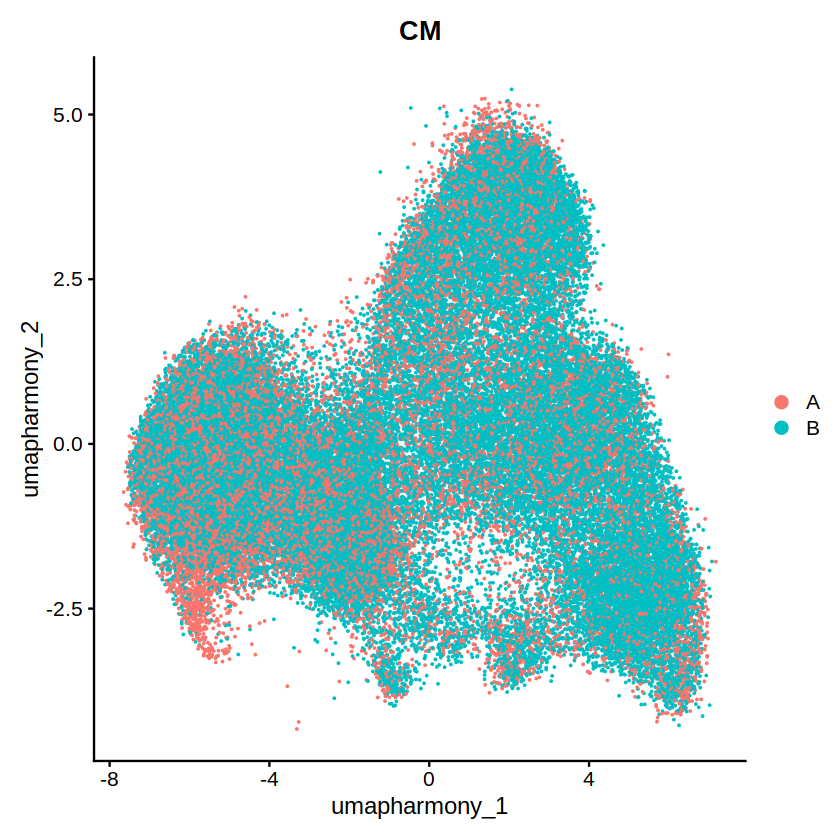

In [6]:
DimPlot(obj.rna, reduction = "umap_harmony", group.by = "batch", shuffle = TRUE) +
    ggtitle("CM")

In [9]:
## add data quality for ATAC-seq
proj <- loadArchRProject("../data/snATAC", showLogo = FALSE)

metadata_atac <- as.data.frame(proj@cellColData) %>%
    subset(., select = c("DoubletEnrichment", "TSSEnrichment", "nFrags"))

metadata_atac <- metadata_atac[colnames(obj.atac), ]
head(metadata_atac)

Successfully loaded ArchRProject!



DoubletEnrichment TSSEnrichment nFrags
CK171#CGGACCAGTGAGTTGG-1 0.36              8.143         64275 
CK171#AAAGGGCAGGTAGGAA-1 0.88              7.651         63910 
CK171#TCTAGTTTCCACCTAC-1 5.28              9.404         57719 
CK171#GTAGTACAGGCCTAAG-1 1.72              7.601         46699 
CK171#GGGTCTGTCGGGTCCA-1 0.60              5.805         43146 
CK171#TTCGATTGTGCAACAG-1 3.20              5.695         41894

In [10]:
obj.atac <- AddMetaData(obj.atac, metadata = metadata_atac)

In [37]:
resolutions <- seq(0.2, 1, 0.1)

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


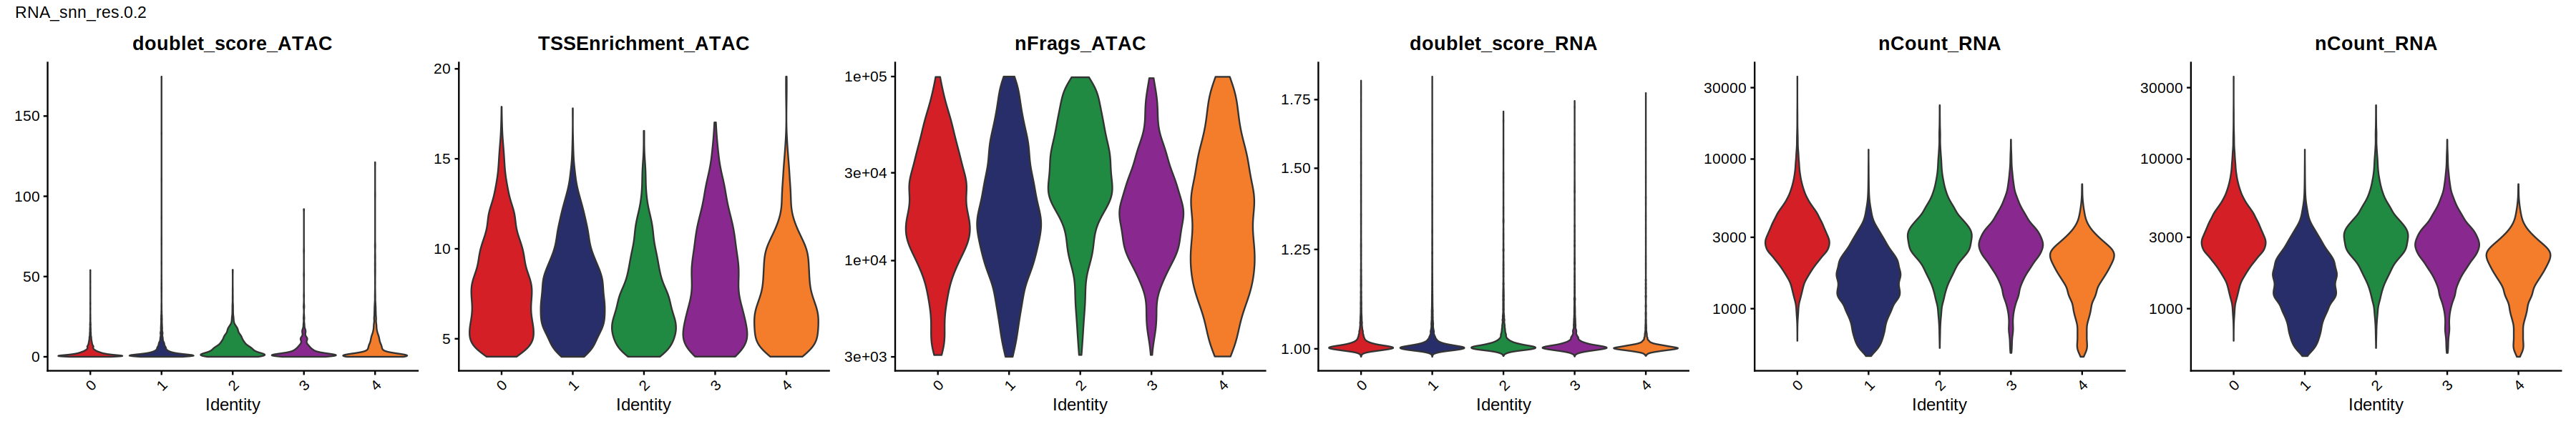

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


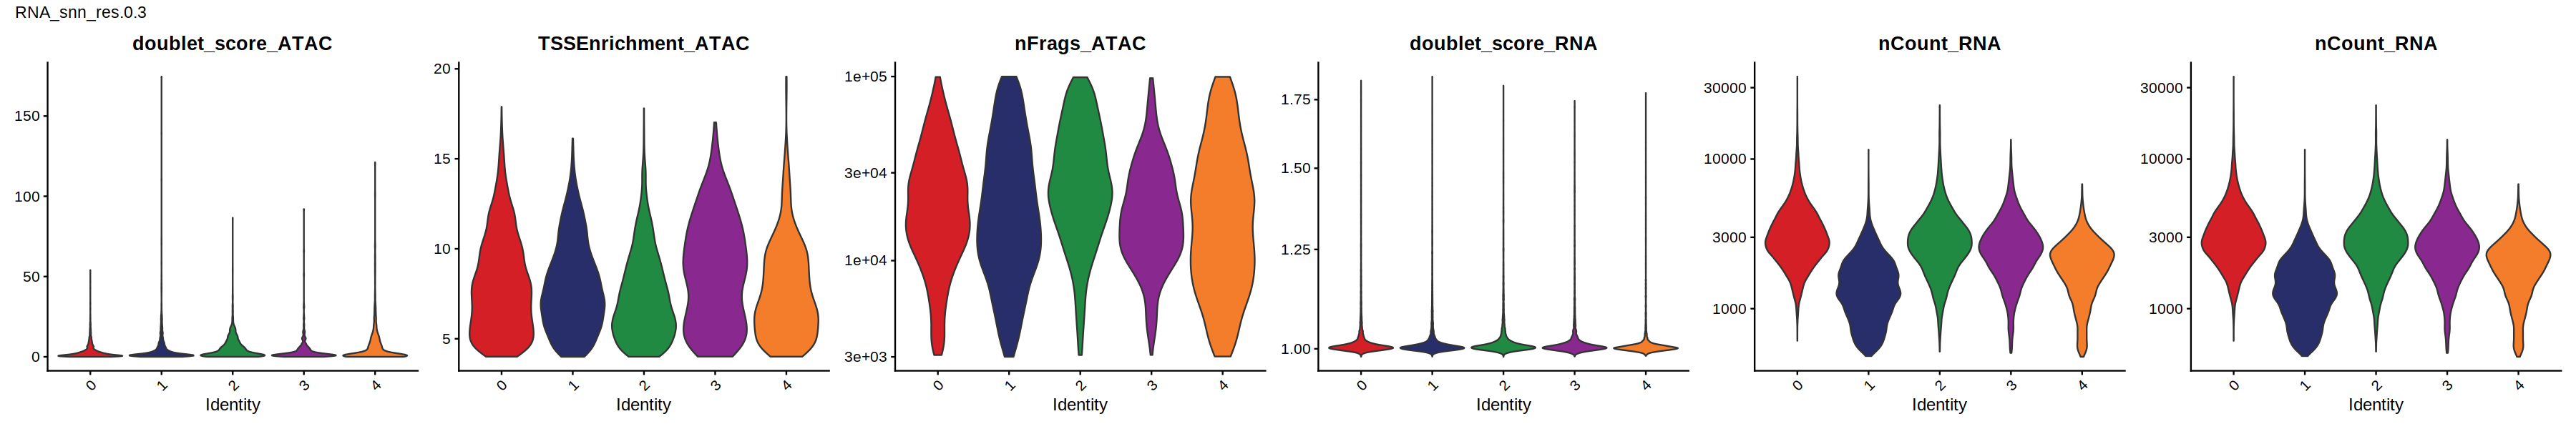

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


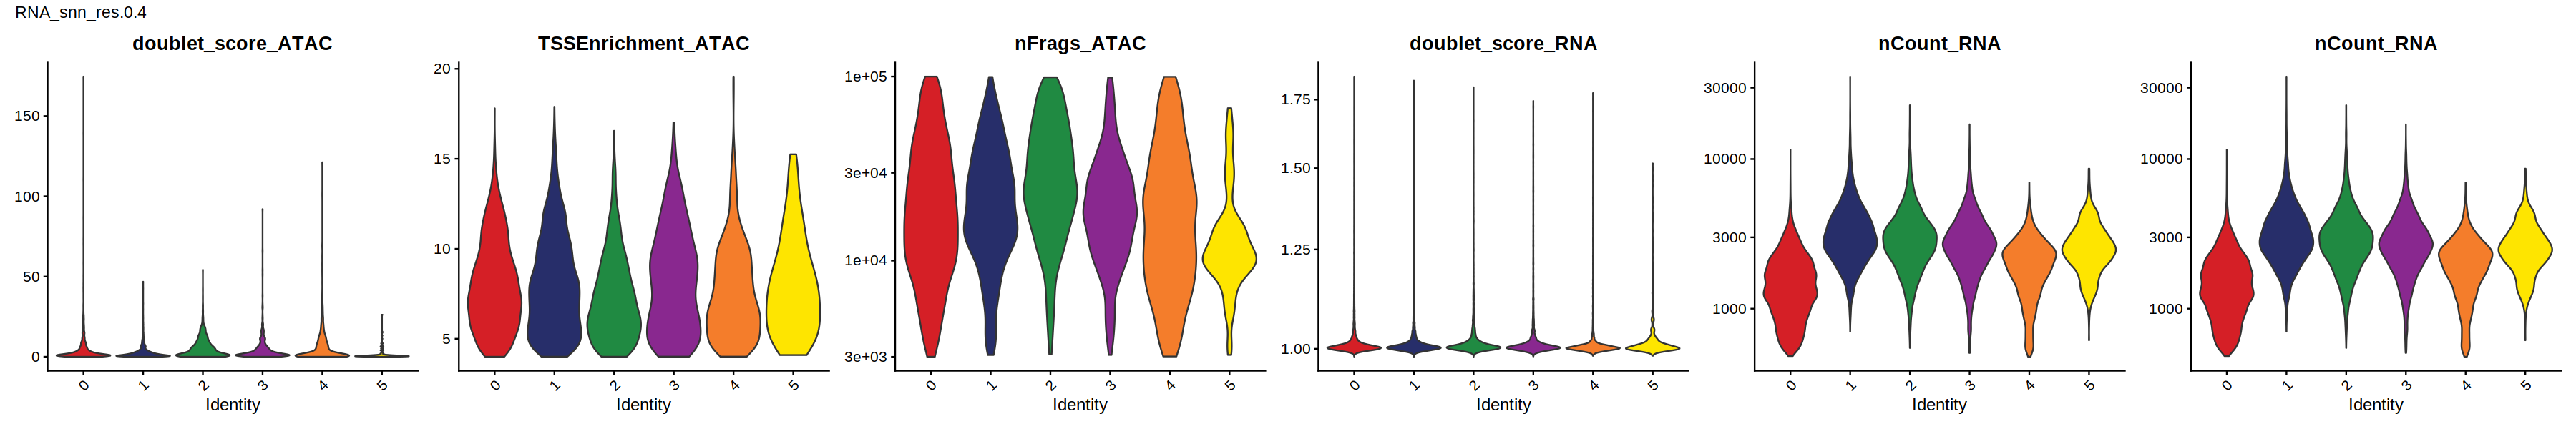

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


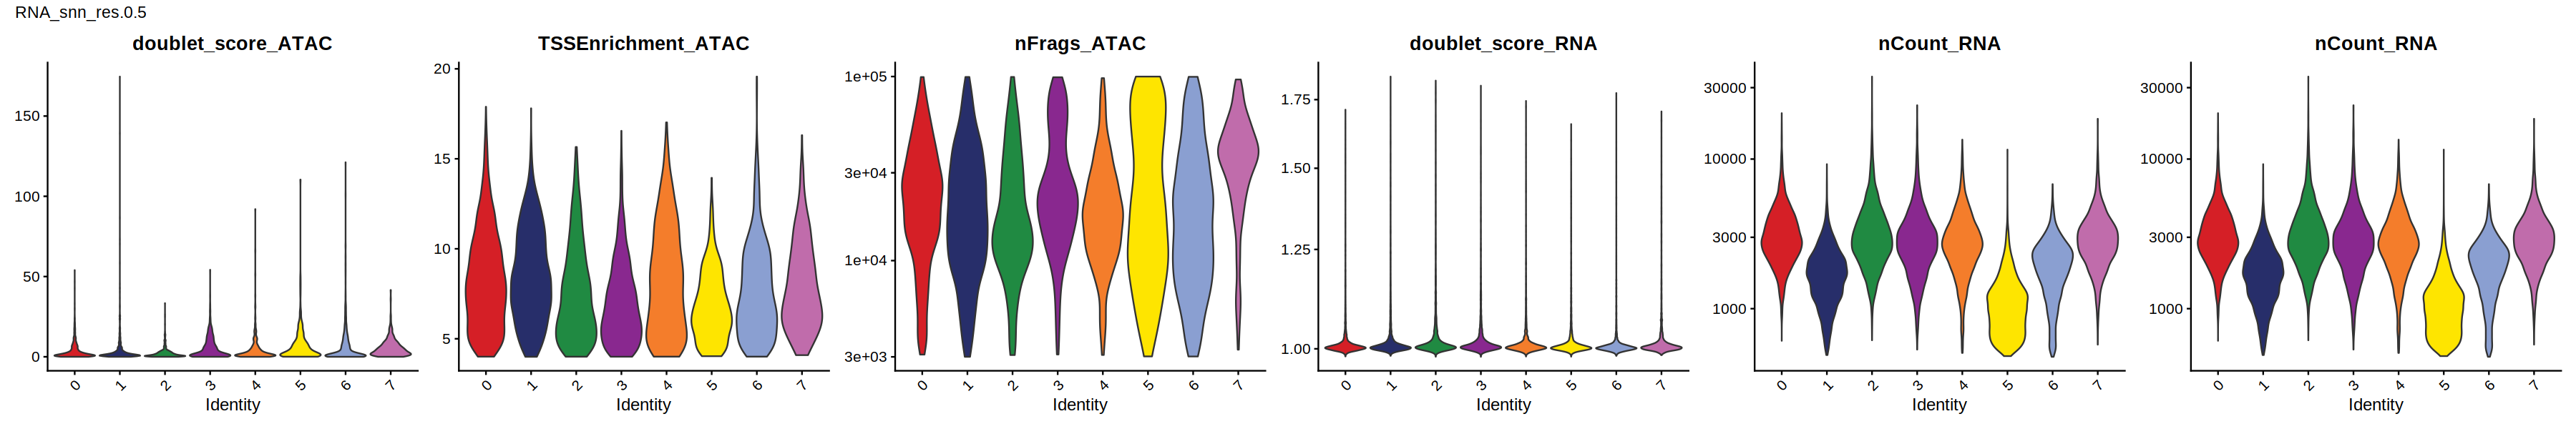

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


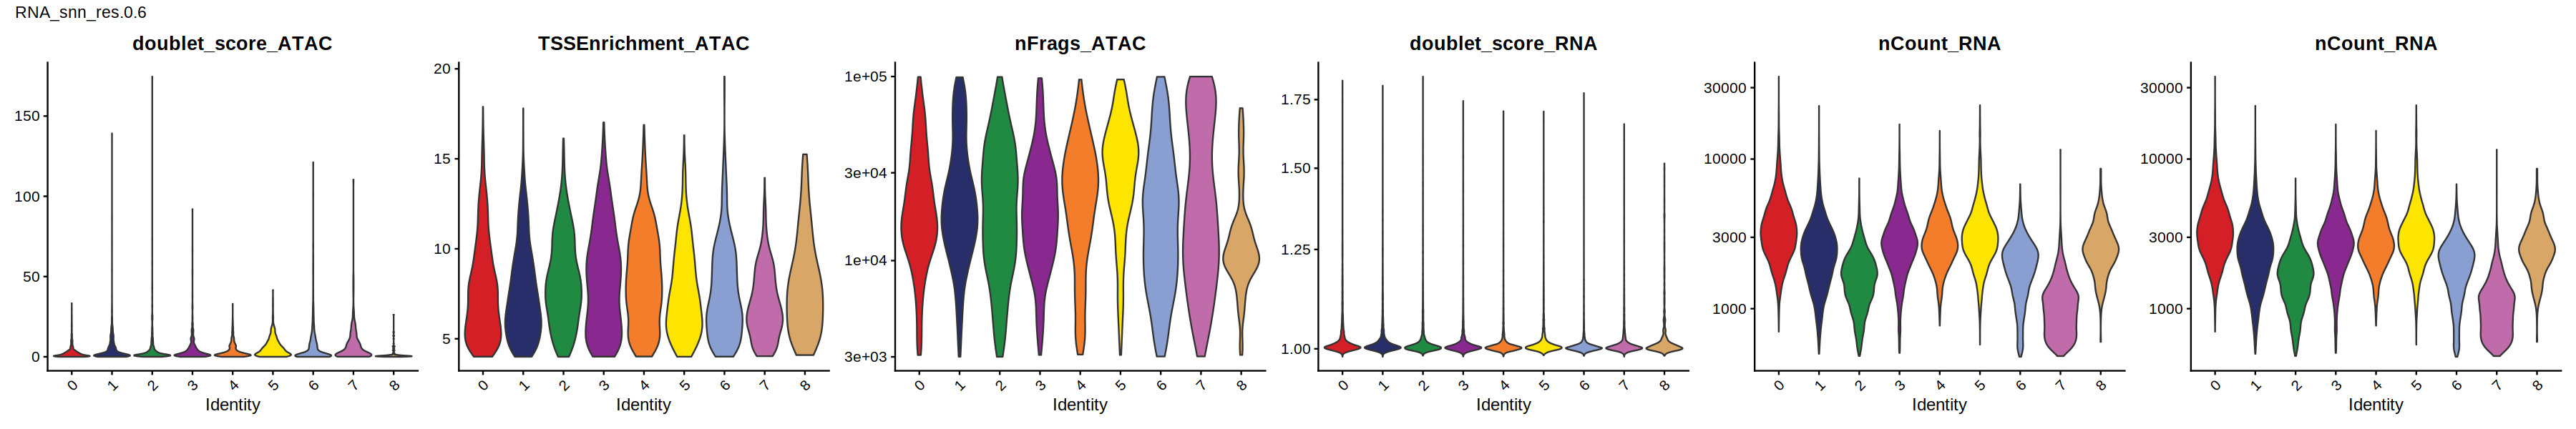

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


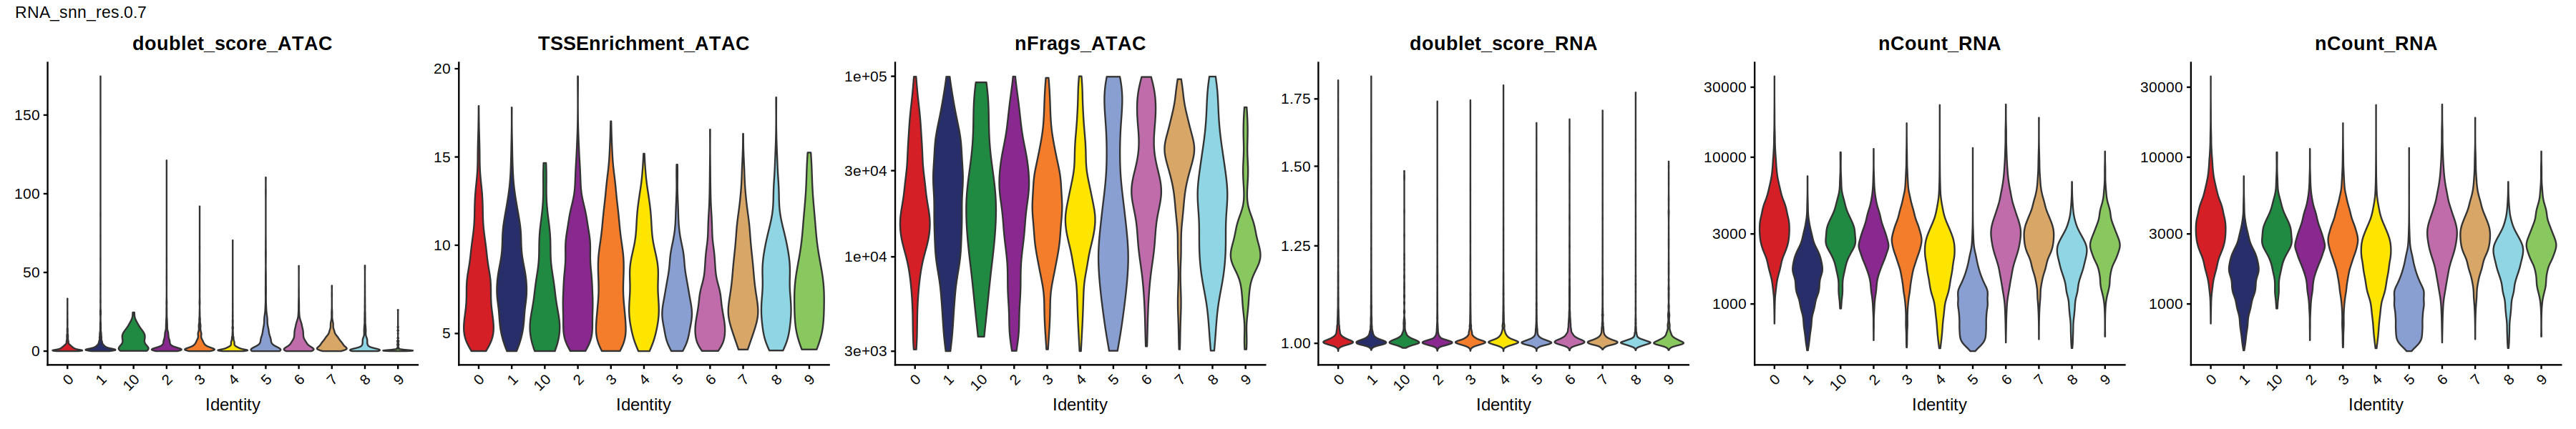

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


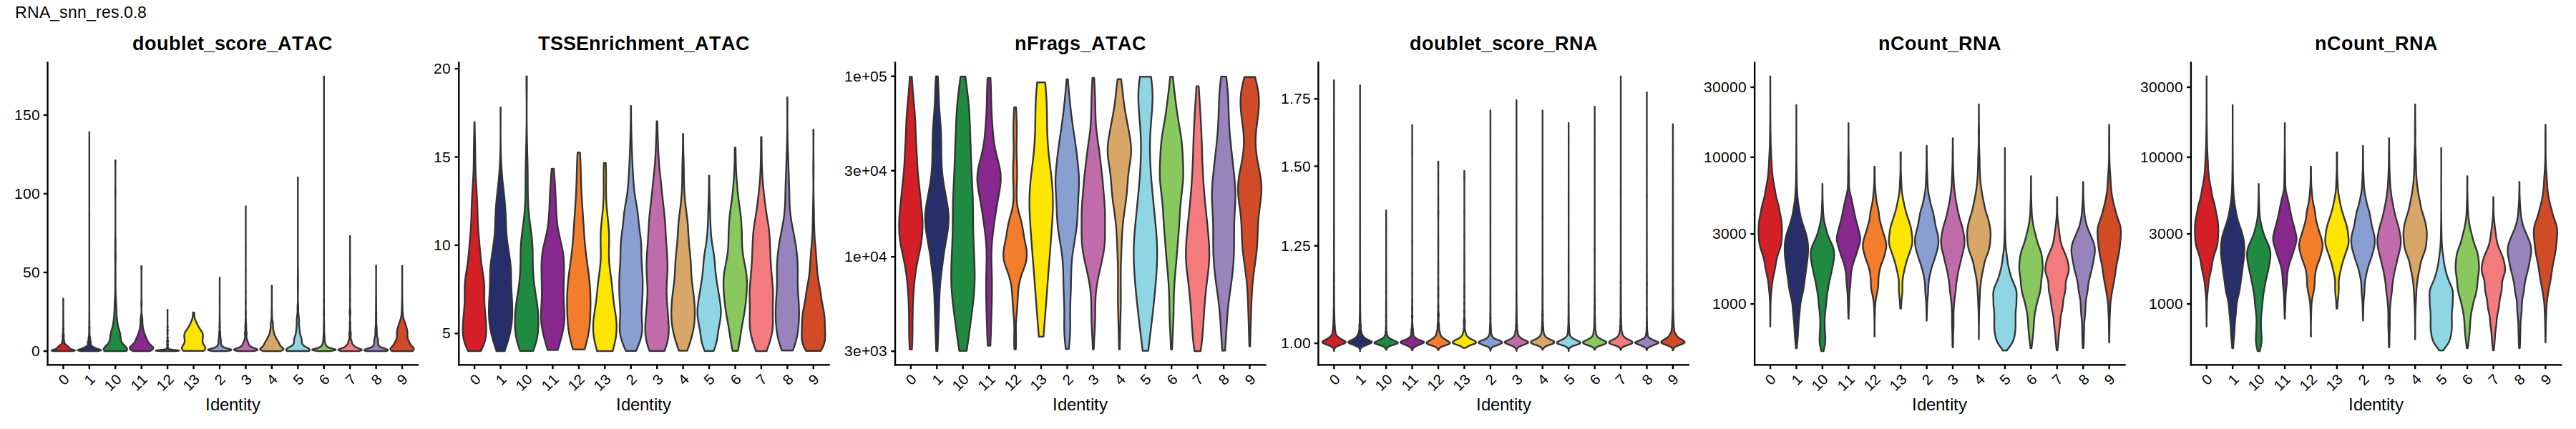

Warning message:
“Removed 371 rows containing non-finite values (stat_ydensity).”


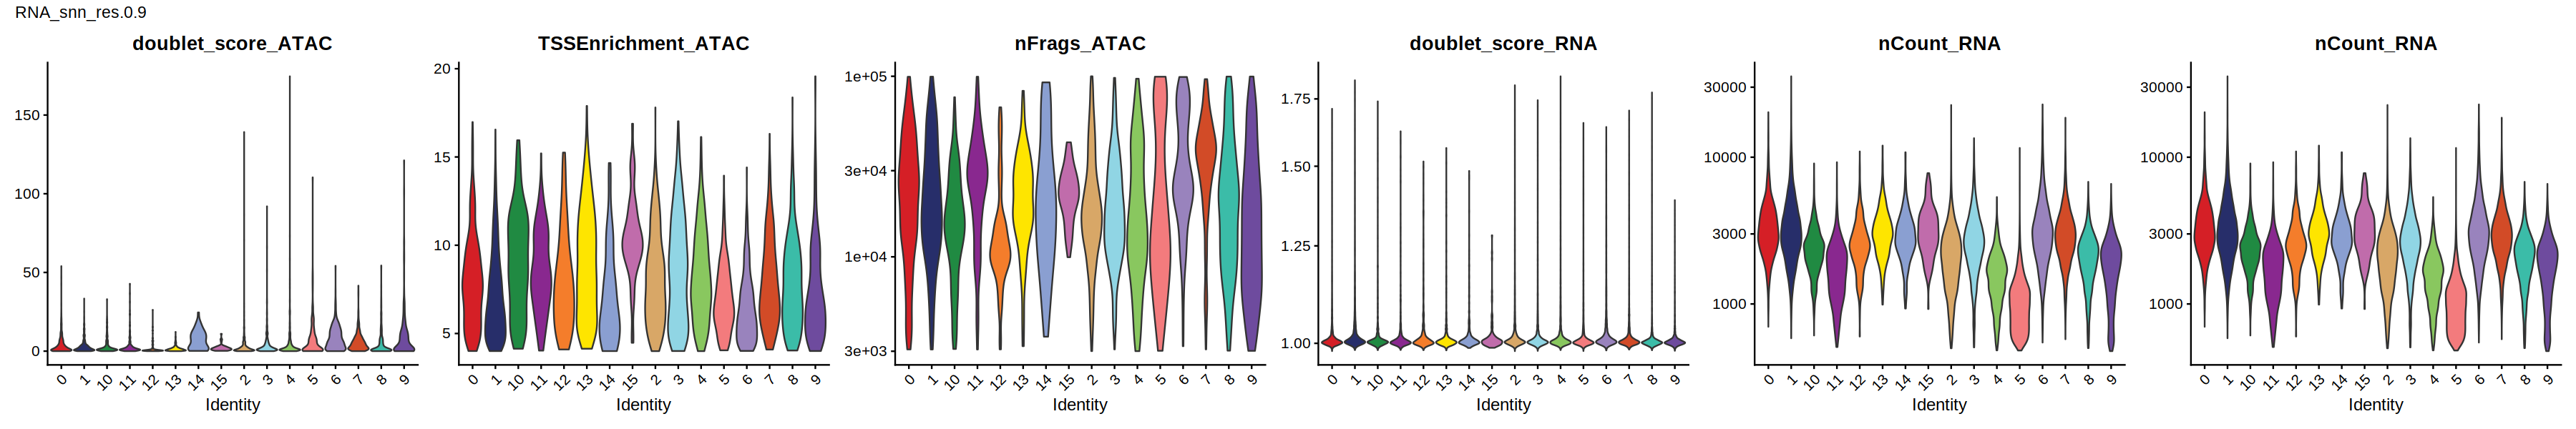

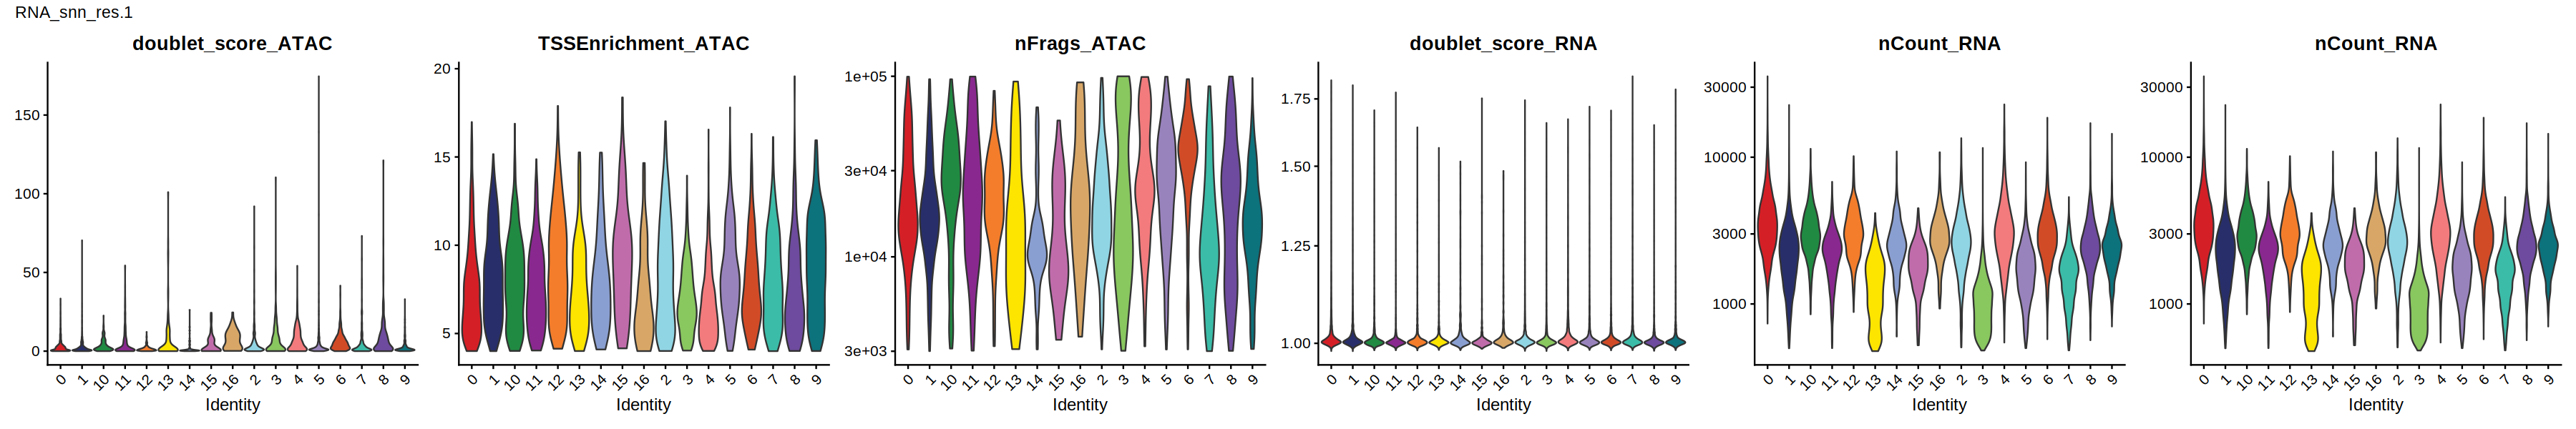

In [65]:
options(repr.plot.height = 5, repr.plot.width = 30)

for(res in resolutions){
    Idents(obj.atac) <- glue::glue("RNA_snn_res.{res}")
    Idents(obj.rna) <- glue::glue("RNA_snn_res.{res}")
    
    cols <- ArchR::paletteDiscrete(coembed@meta.data[, glue::glue("RNA_snn_res.{res}")])
    
    
    p1 <- VlnPlot(obj.atac, feature = "DoubletEnrichment", pt.size = 0, cols = cols) +
    ggtitle("doublet_score_ATAC") + NoLegend()
    p2 <- VlnPlot(obj.atac, feature = "TSSEnrichment", pt.size = 0, cols = cols) +
    ggtitle("TSSEnrichment_ATAC") + NoLegend()
    p3 <- VlnPlot(obj.atac, feature = "nFrags", pt.size = 0, log = TRUE, cols = cols) +
    ggtitle("nFrags_ATAC") + NoLegend()
    

    p4 <- VlnPlot(obj.rna, feature = "doublet_score", pt.size = 0, log = TRUE, cols = cols) +
    ggtitle("doublet_score_RNA") + NoLegend()
    p5 <- VlnPlot(obj.rna, feature = "nCount_RNA", pt.size = 0, log = TRUE, cols = cols) + NoLegend()
    p6 <- VlnPlot(obj.rna, feature = "nFeature_RNA", pt.size = 0, cols = cols) + NoLegend()
    

    ps1 <- patchwork::wrap_plots(list(p1, p2, p3, p4, p5, p5), nrow = 1, guides = "collect") +
    patchwork::plot_annotation(title = glue::glue("RNA_snn_res.{res}"))

    print(ps1)
    
}

In [61]:
## add module score
coembed <- AddModuleScore(coembed, features = list(c("DCN", "GSN", "PDGFRA")), ctrl = 5, name = "Fibroblast")
coembed <- AddModuleScore(coembed, features = list(c("RGS5", "ABCC9", "KCNJ8", "PDGFRB", "EGFLAM")), ctrl = 5, name = "PERICYTE")
coembed <- AddModuleScore(coembed, features = list(c("VWF", "PECAM1", "CDH5")), ctrl = 5, name = "ENDOTHELIAL")
coembed <- AddModuleScore(coembed, features = list(c("CD14", "C1QA", "CD68")), ctrl = 5, name = "MYELOID")
coembed <- AddModuleScore(coembed, features = list(c("CD8A", "IL7R", "CD3")), ctrl = 5, name = "Lymphoid")
coembed <- AddModuleScore(coembed, features = list(c("MYH7", "MYL2", "RYR2", "ACTA1")), ctrl = 5, name = "CM")
coembed <- AddModuleScore(coembed, features = list(c("GPAM", "FASN", "LEP")), ctrl = 5, name = "ADIPO")
coembed <- AddModuleScore(coembed, features = list(c("PLP1", "NRXN1", "NRXN1")), ctrl = 5, name = "Neuronal")
coembed <- AddModuleScore(coembed, features = list(c("MYH11", "TAGLN", "ACTA2")), ctrl = 5, name = "VSMCs")

Warning message:
“The following features are not present in the object: CD3, not searching for symbol synonyms”


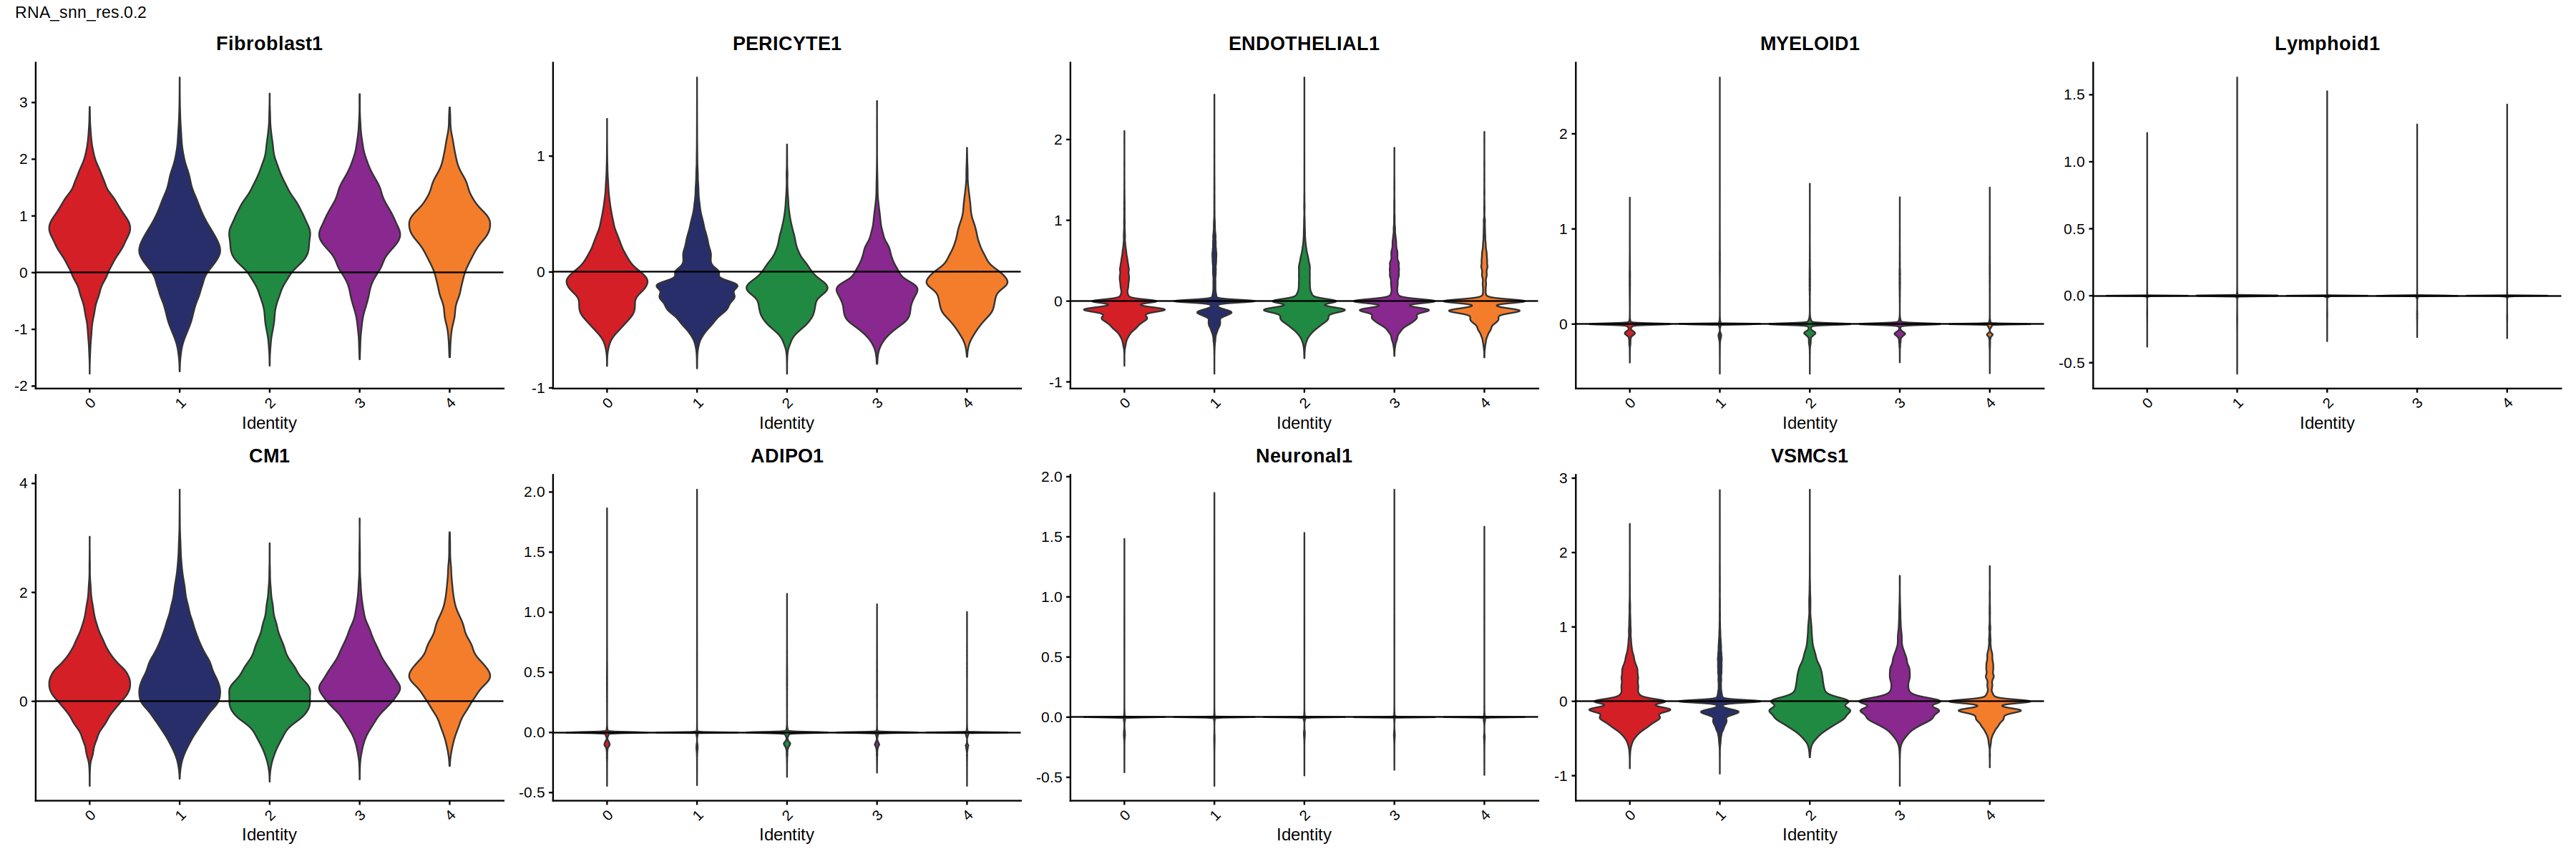

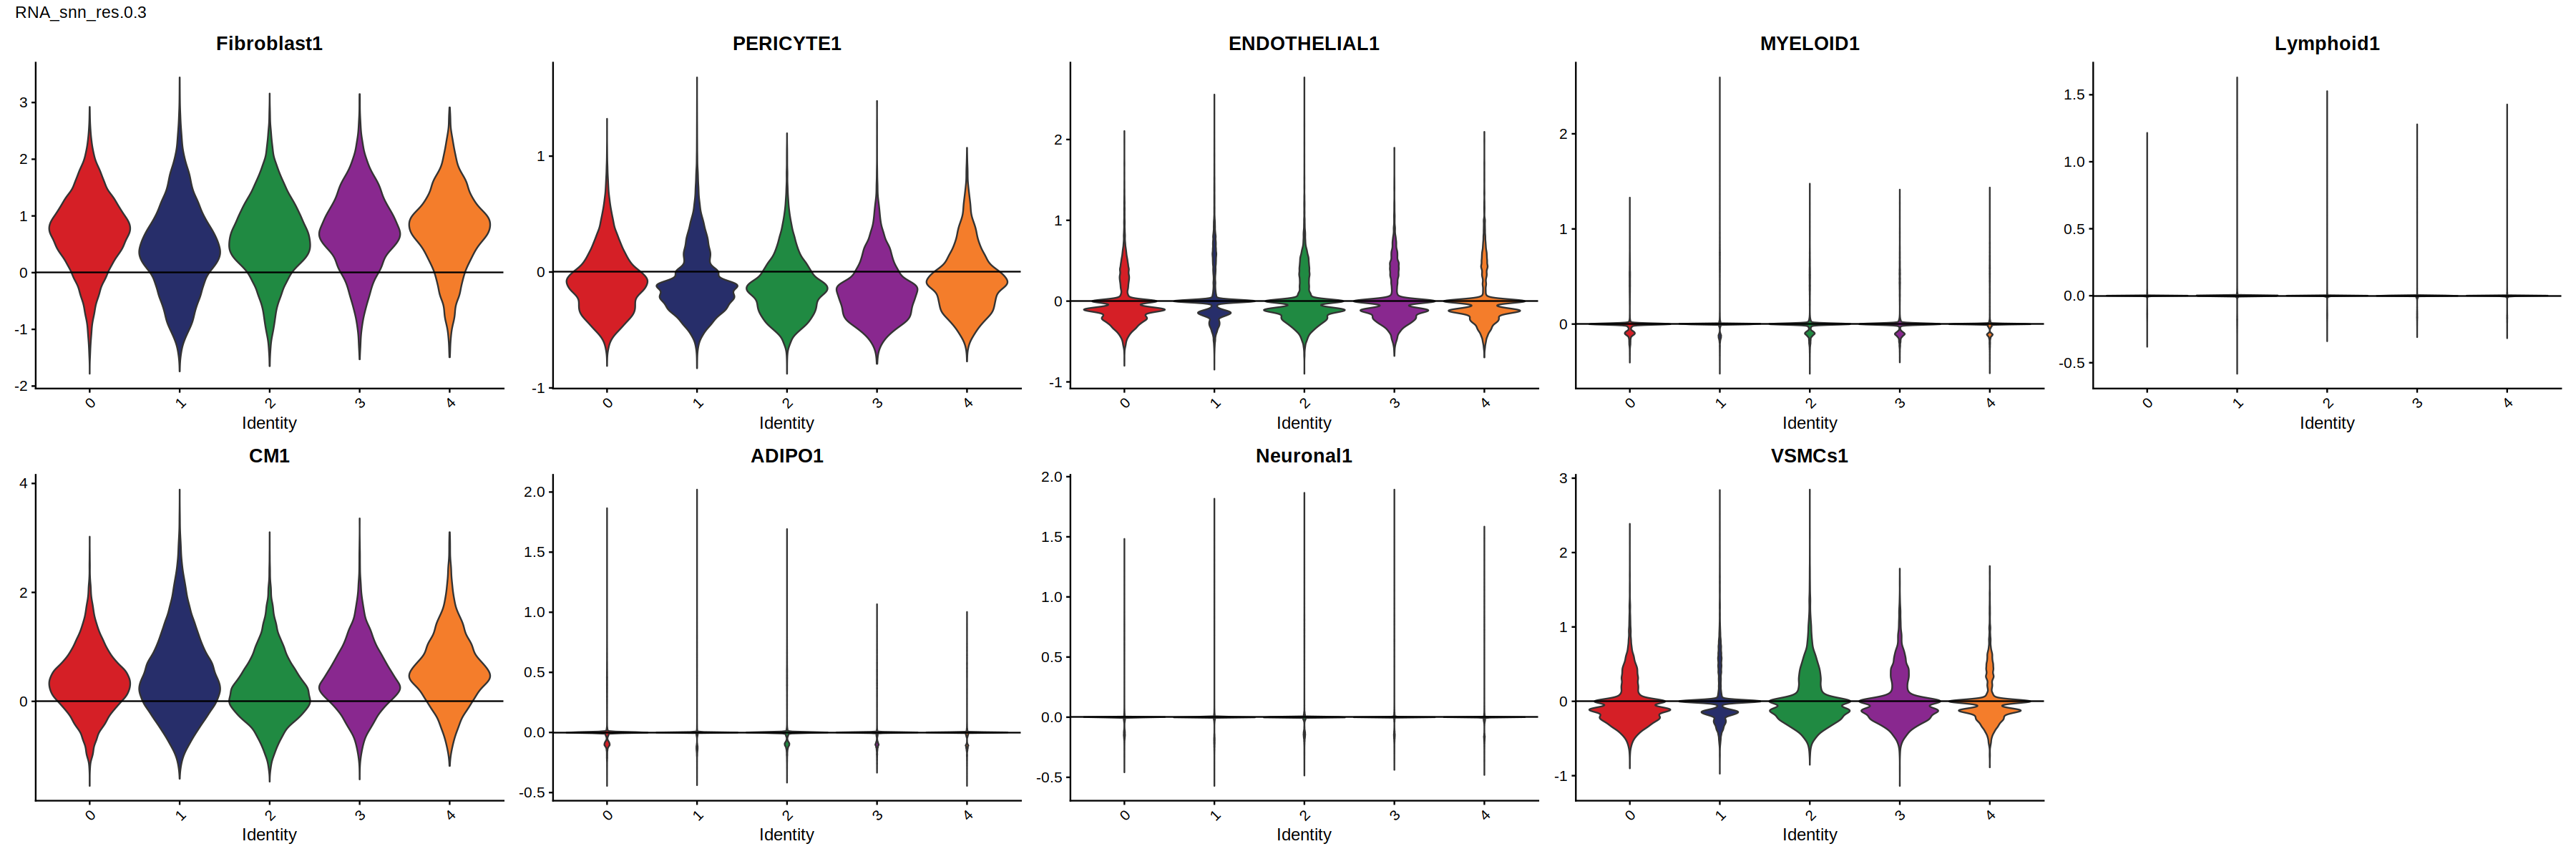

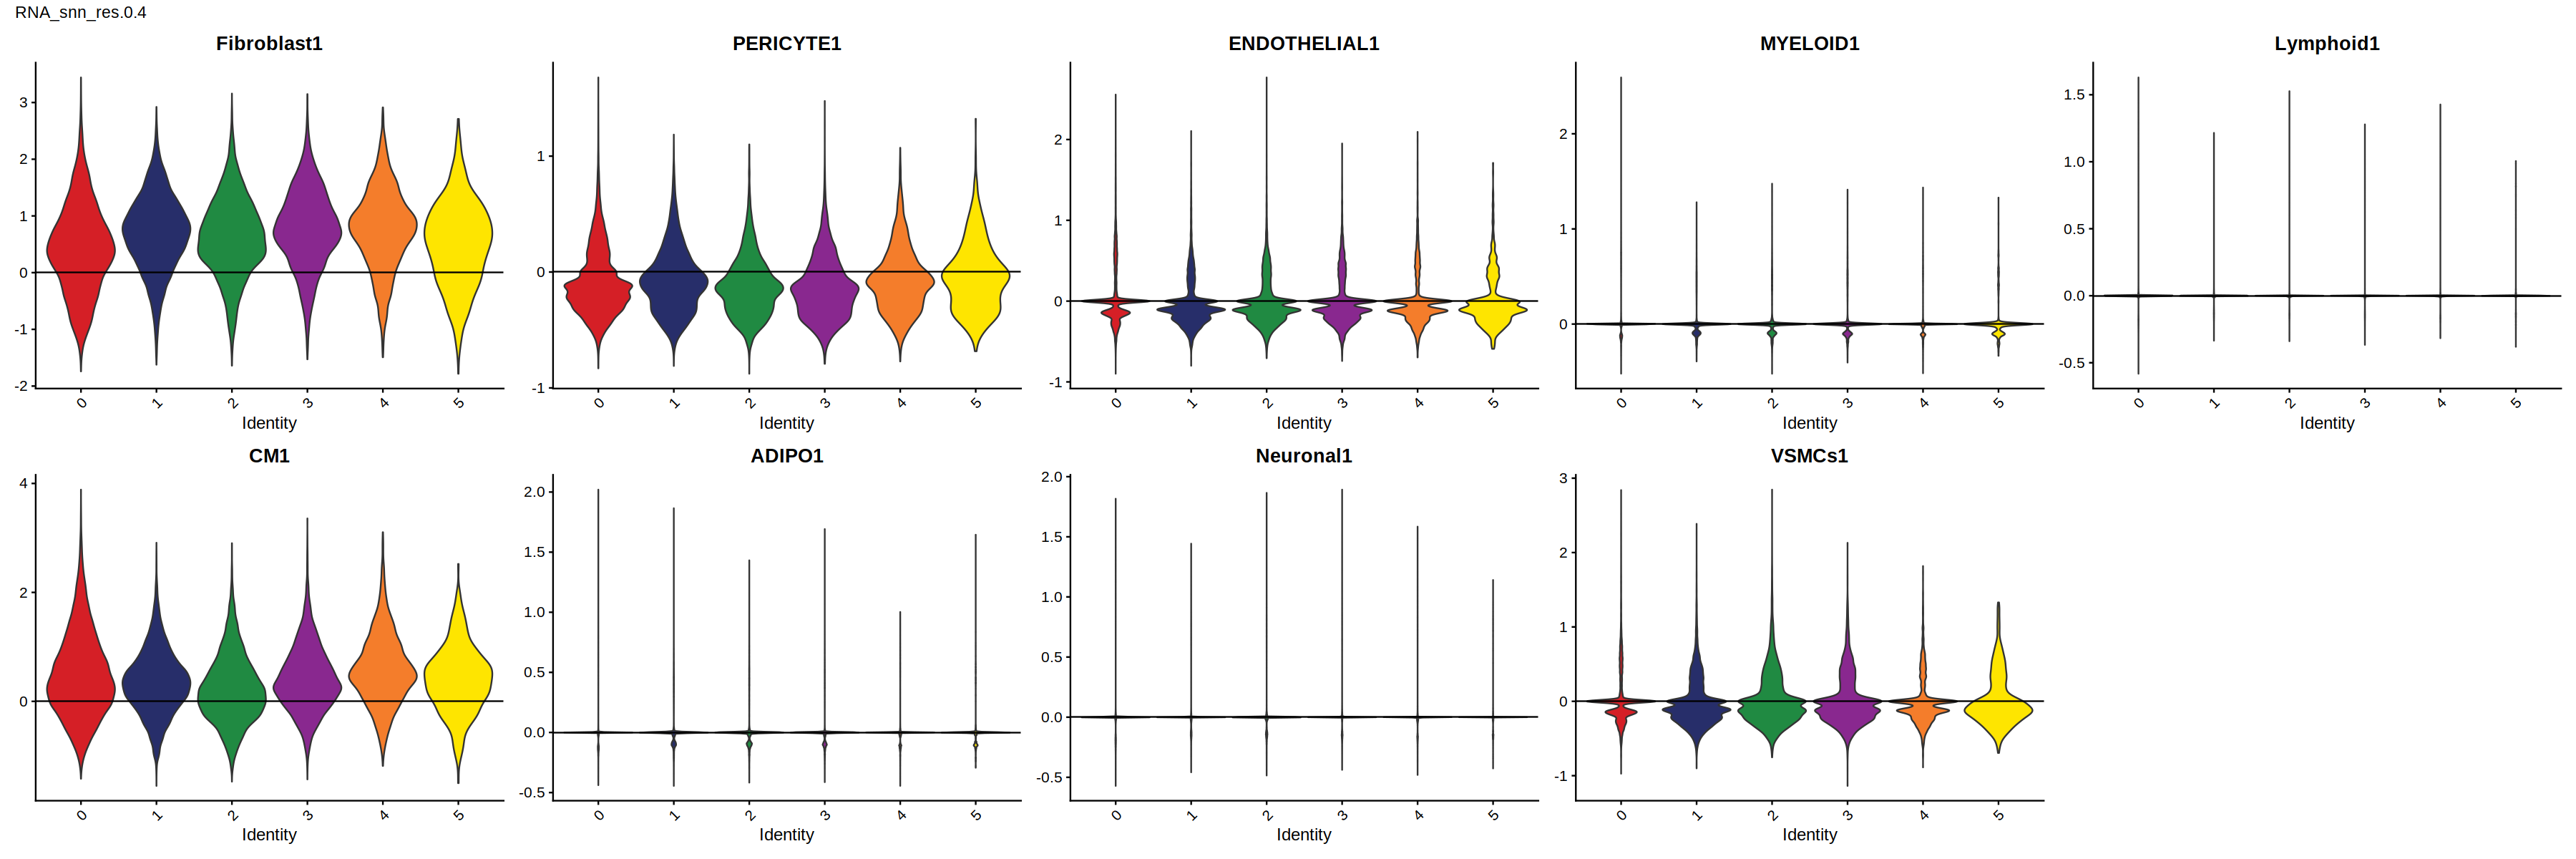

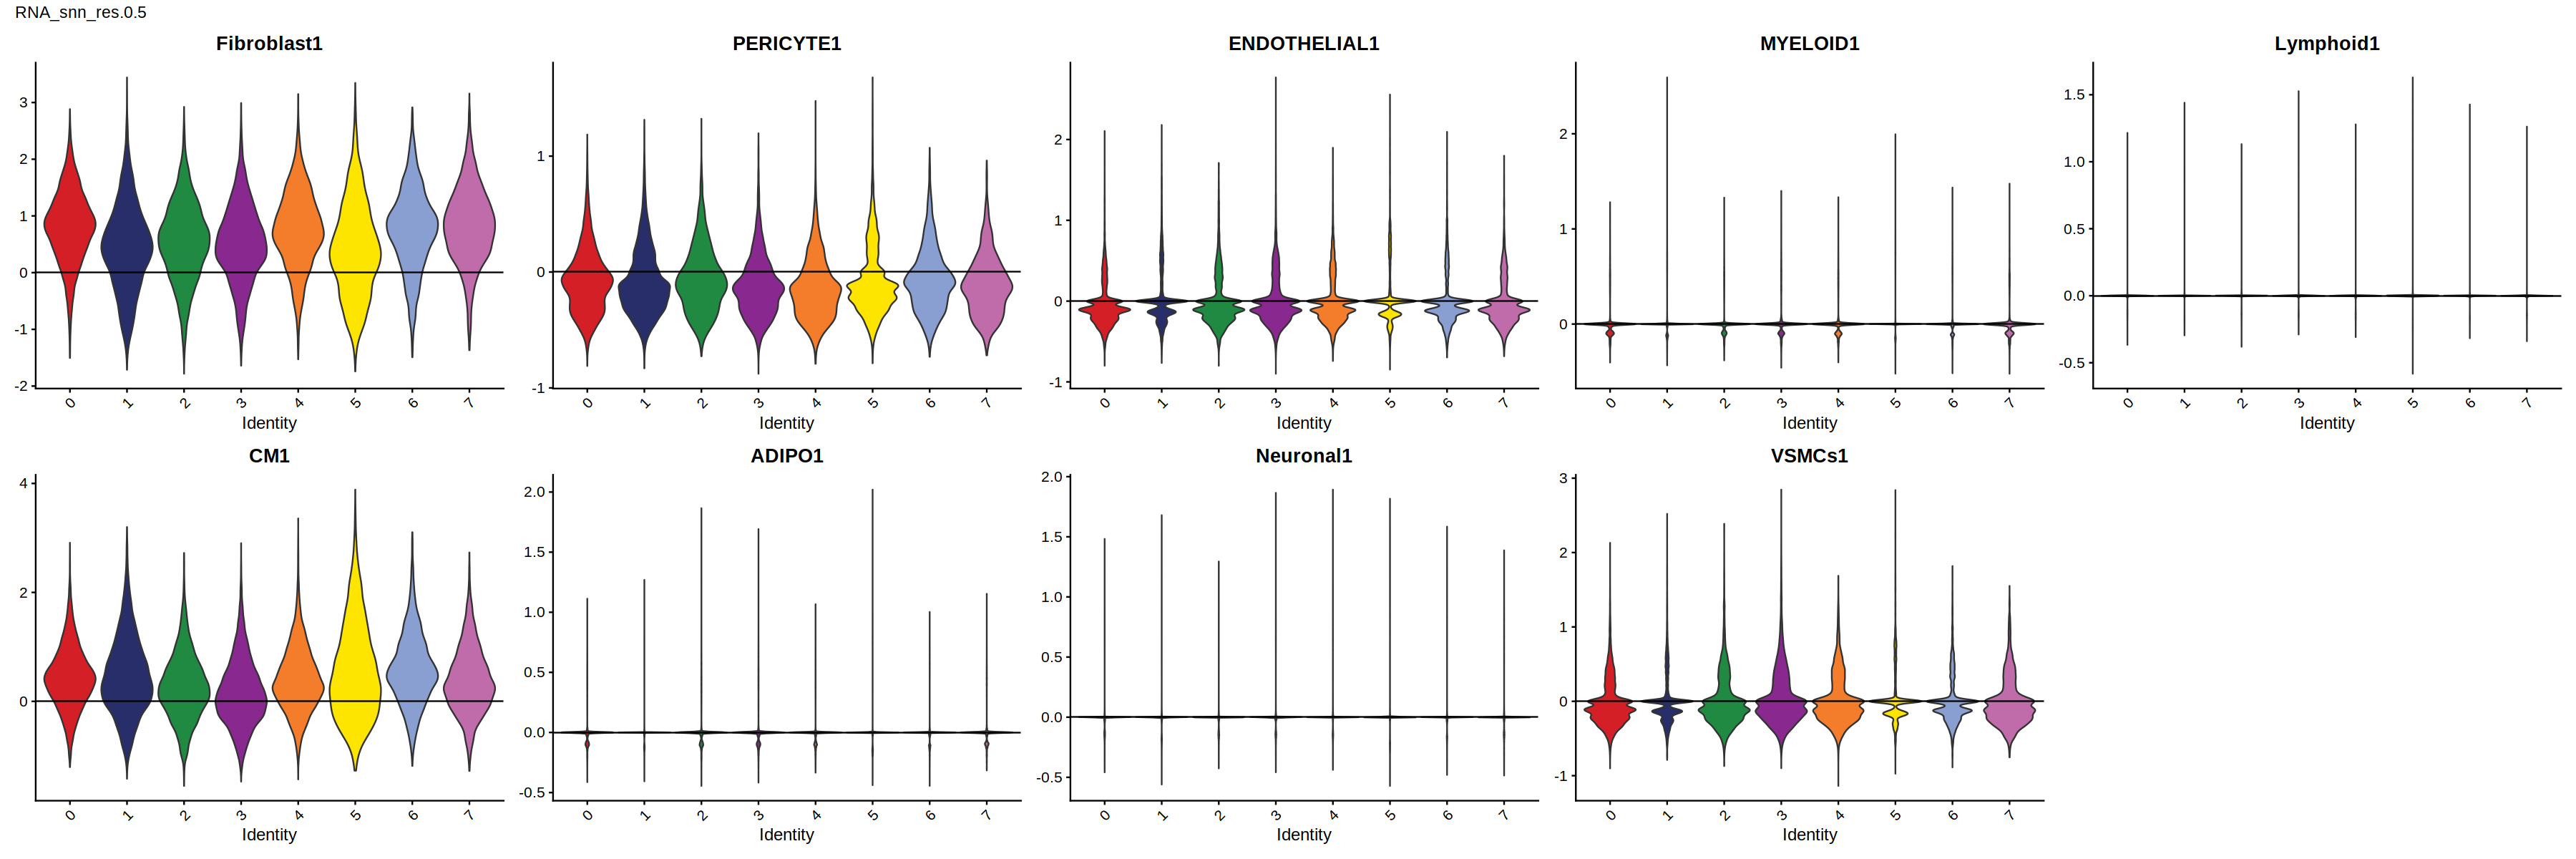

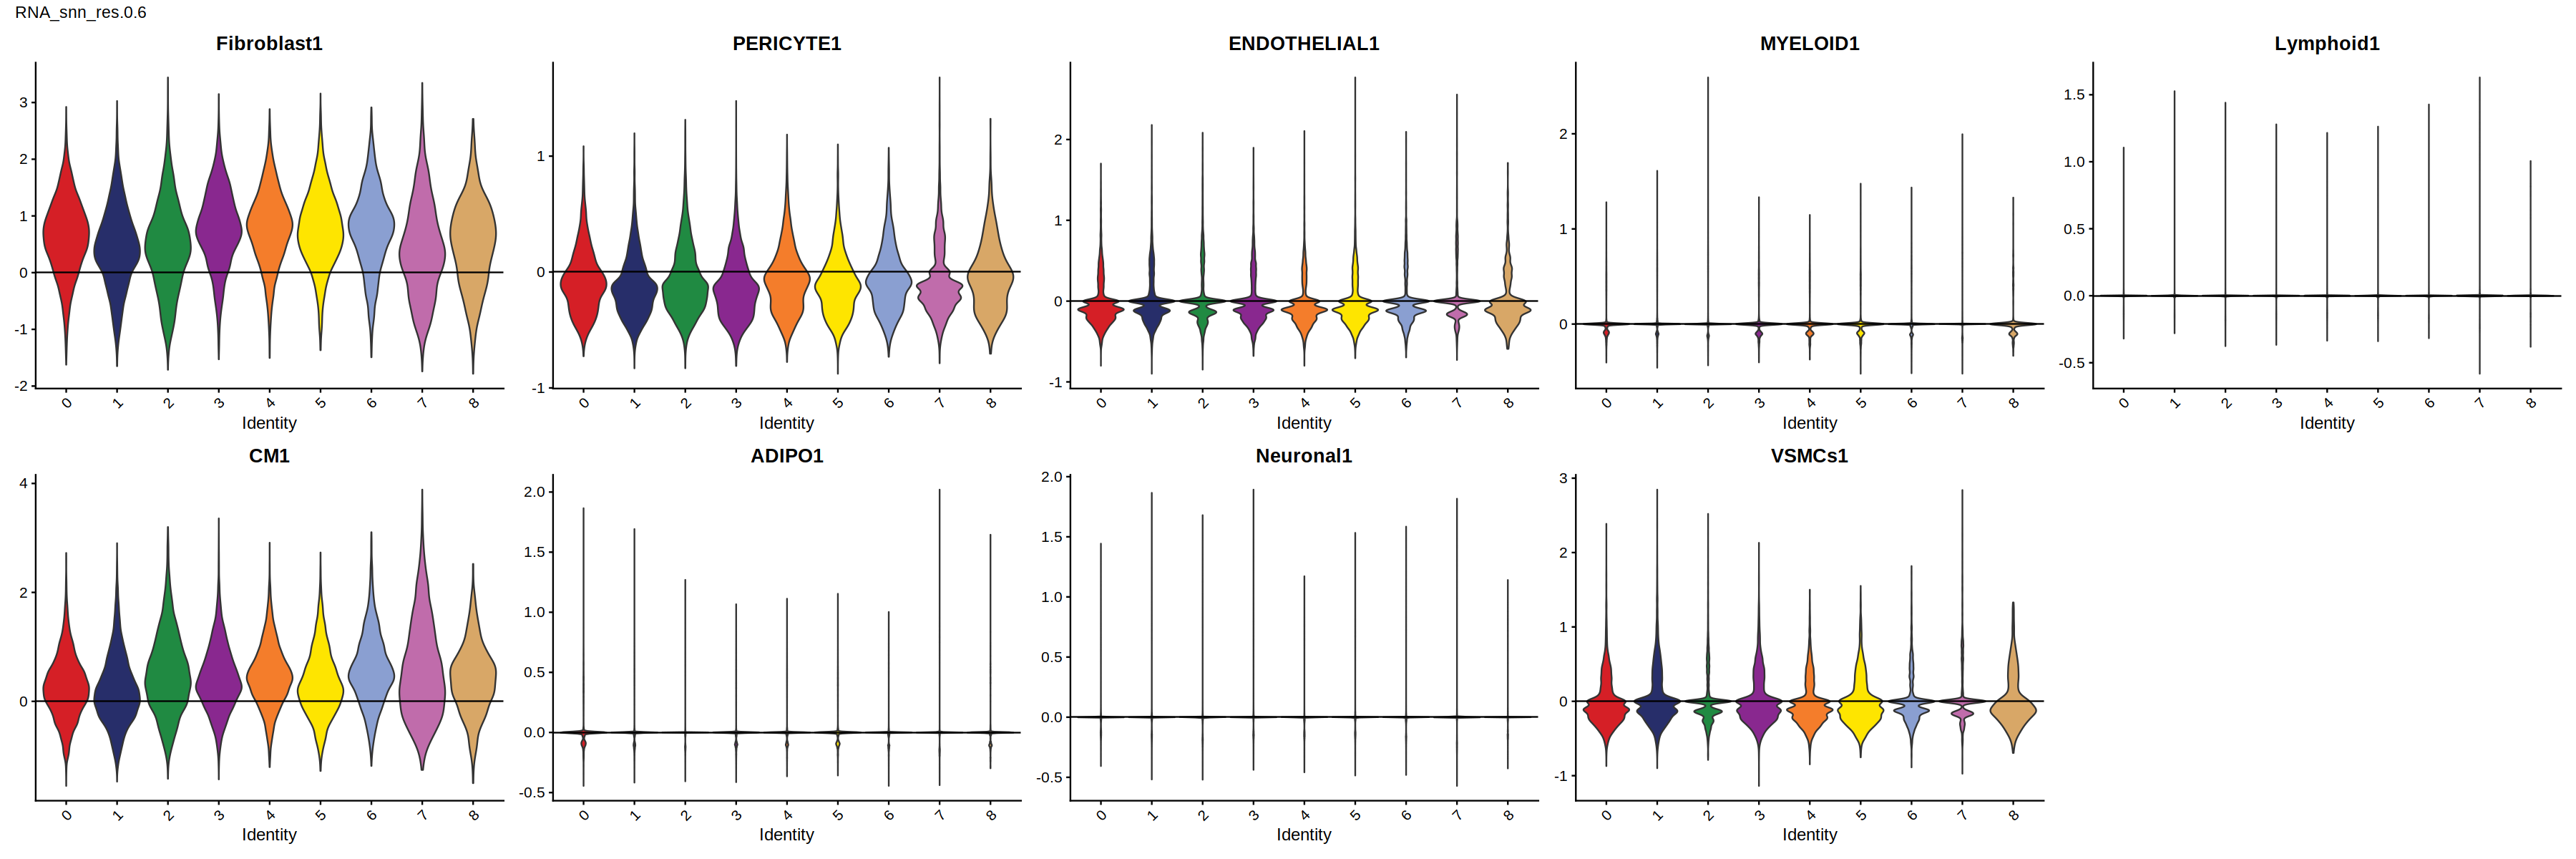

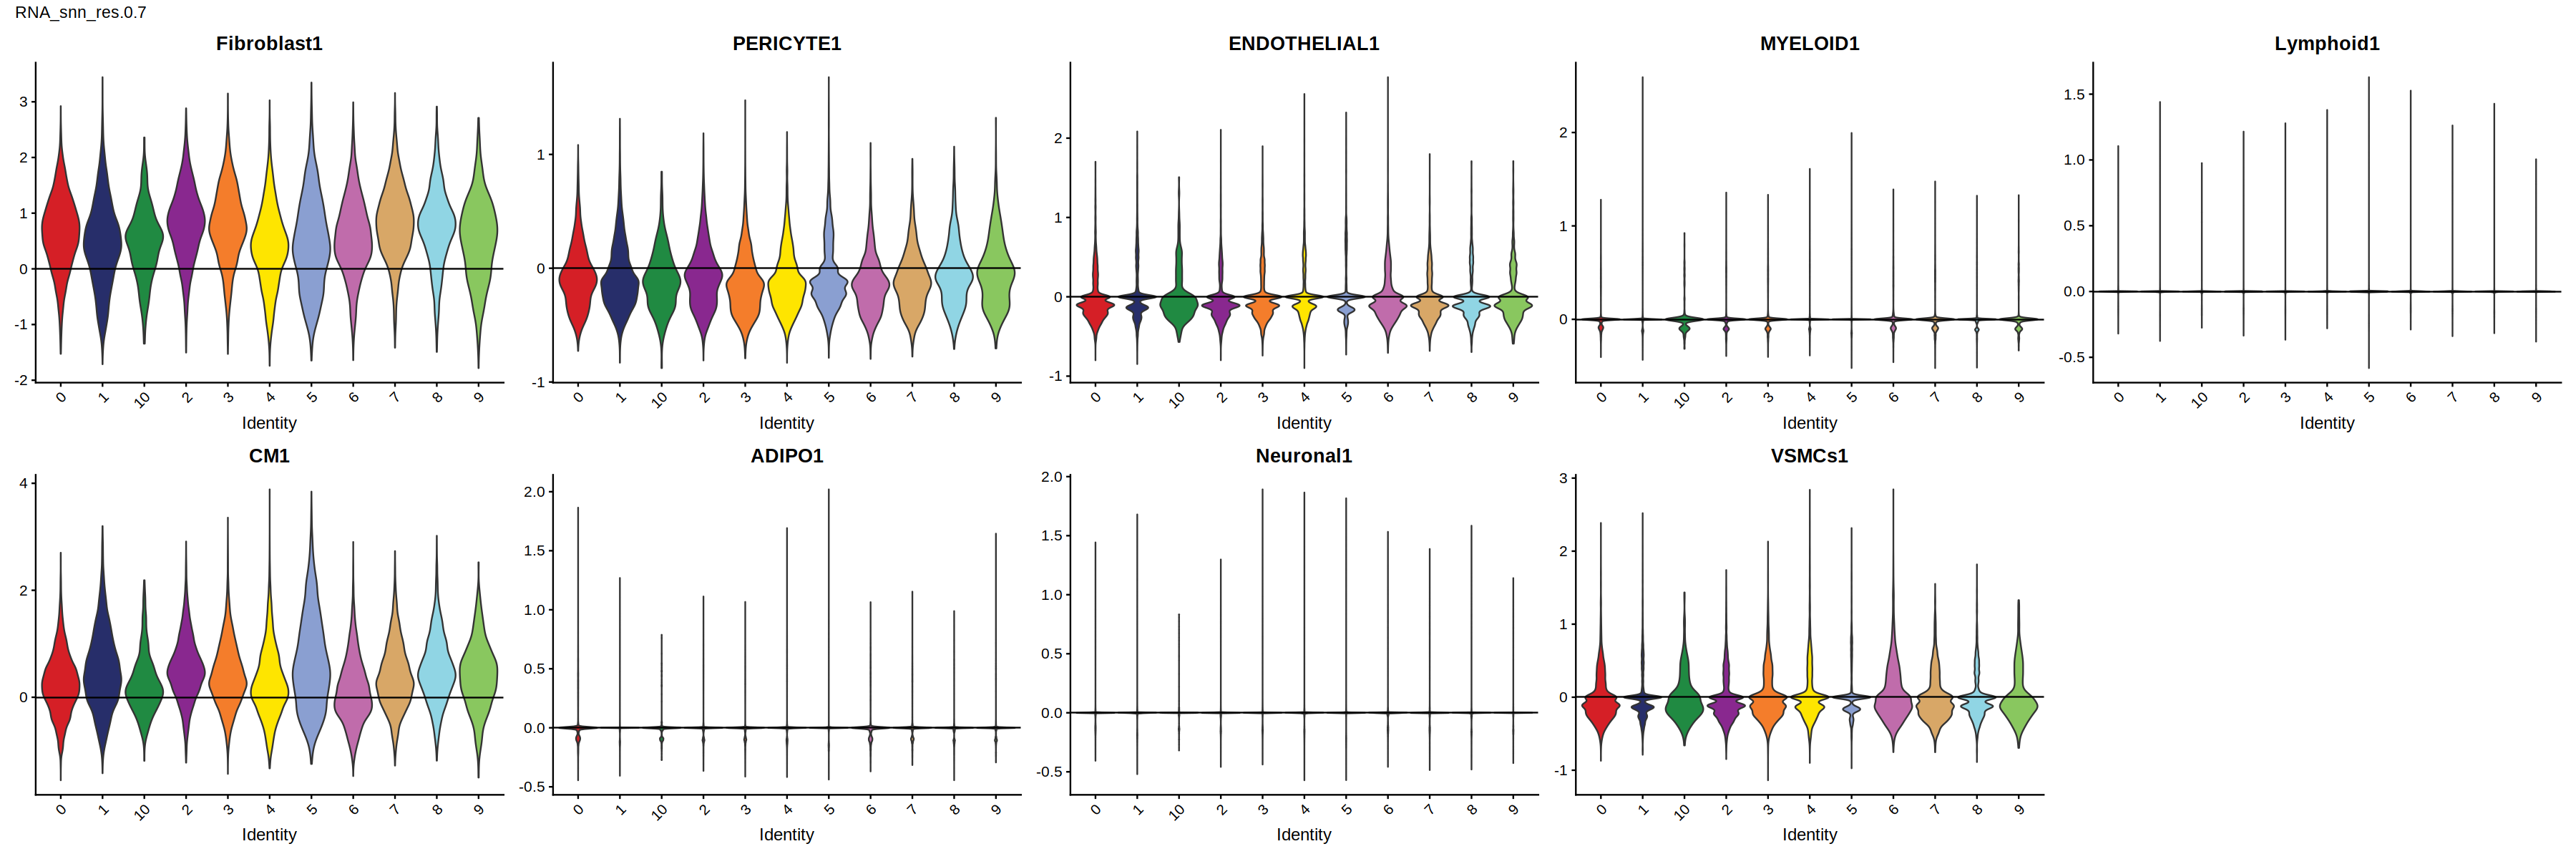

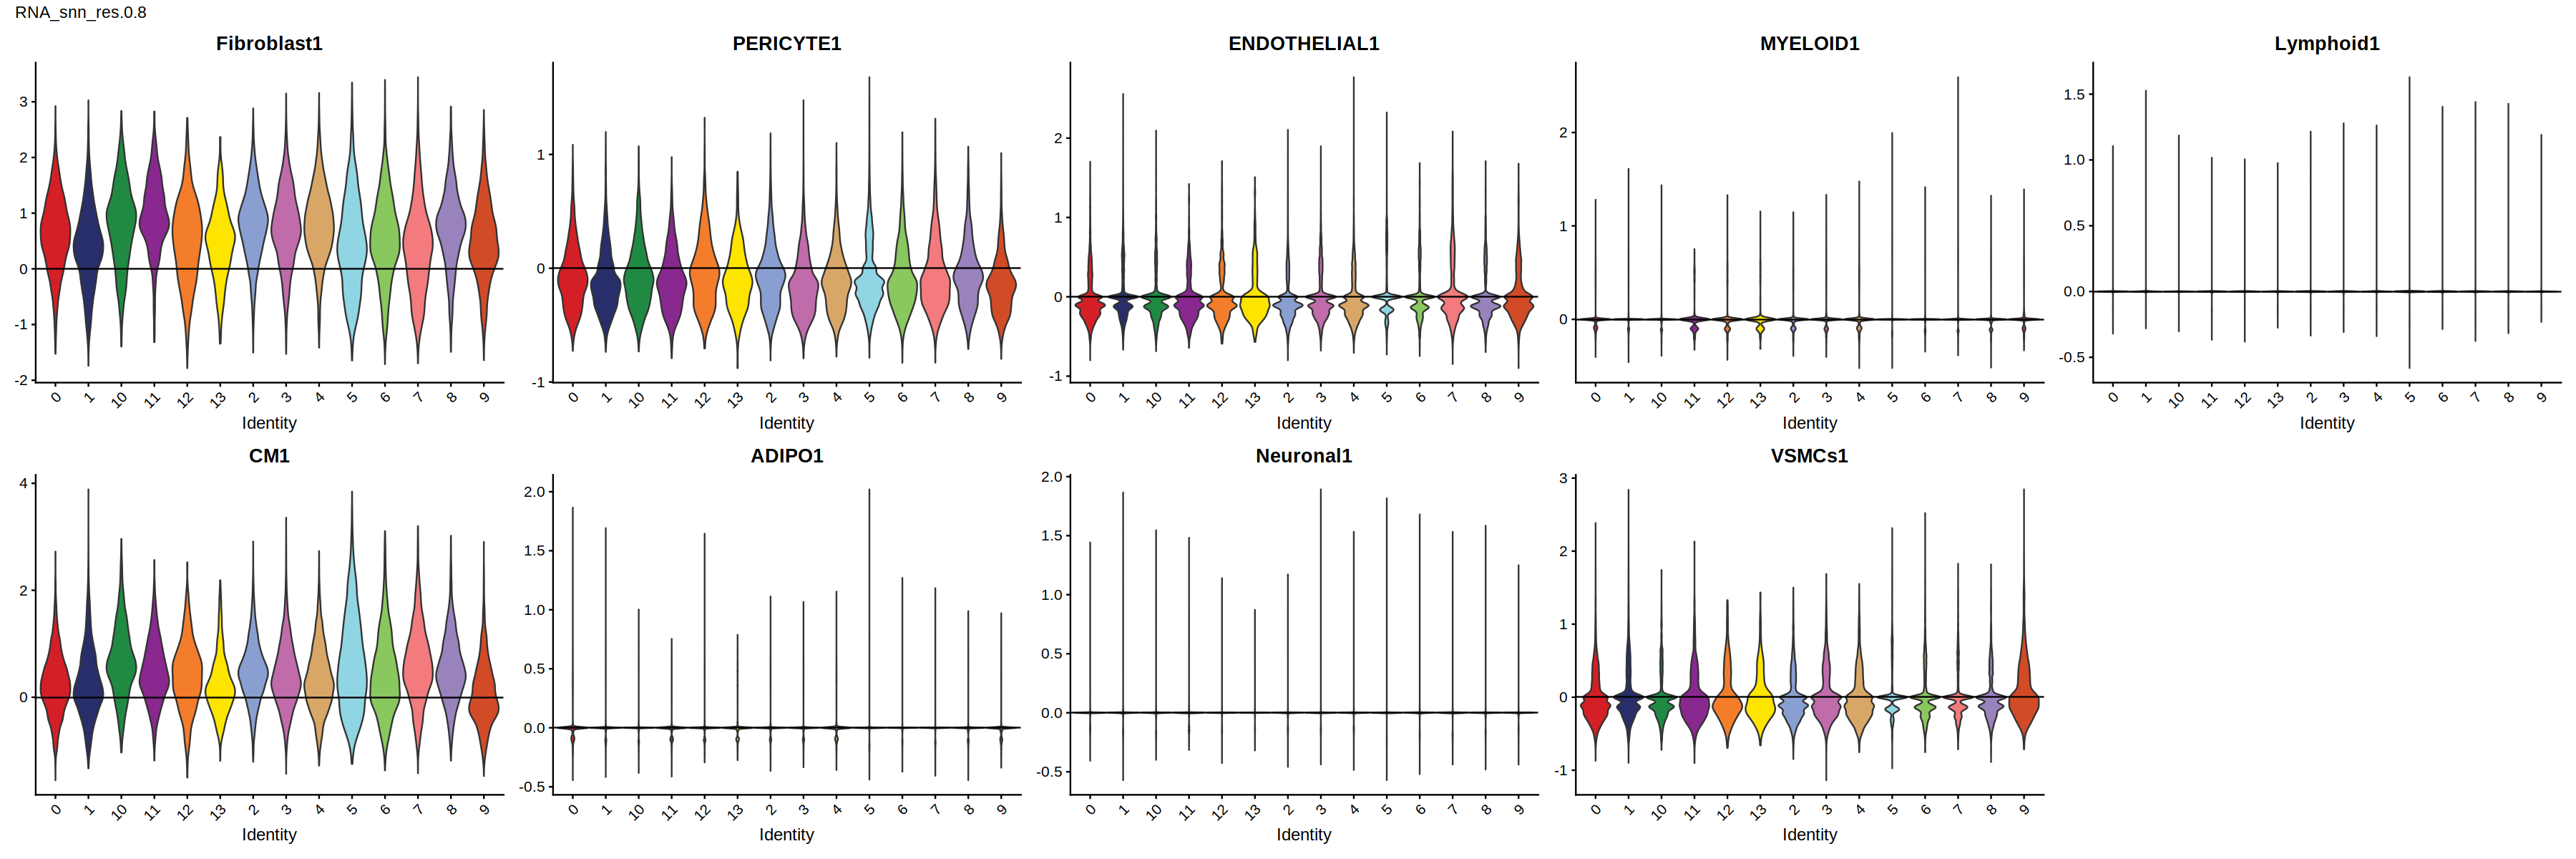

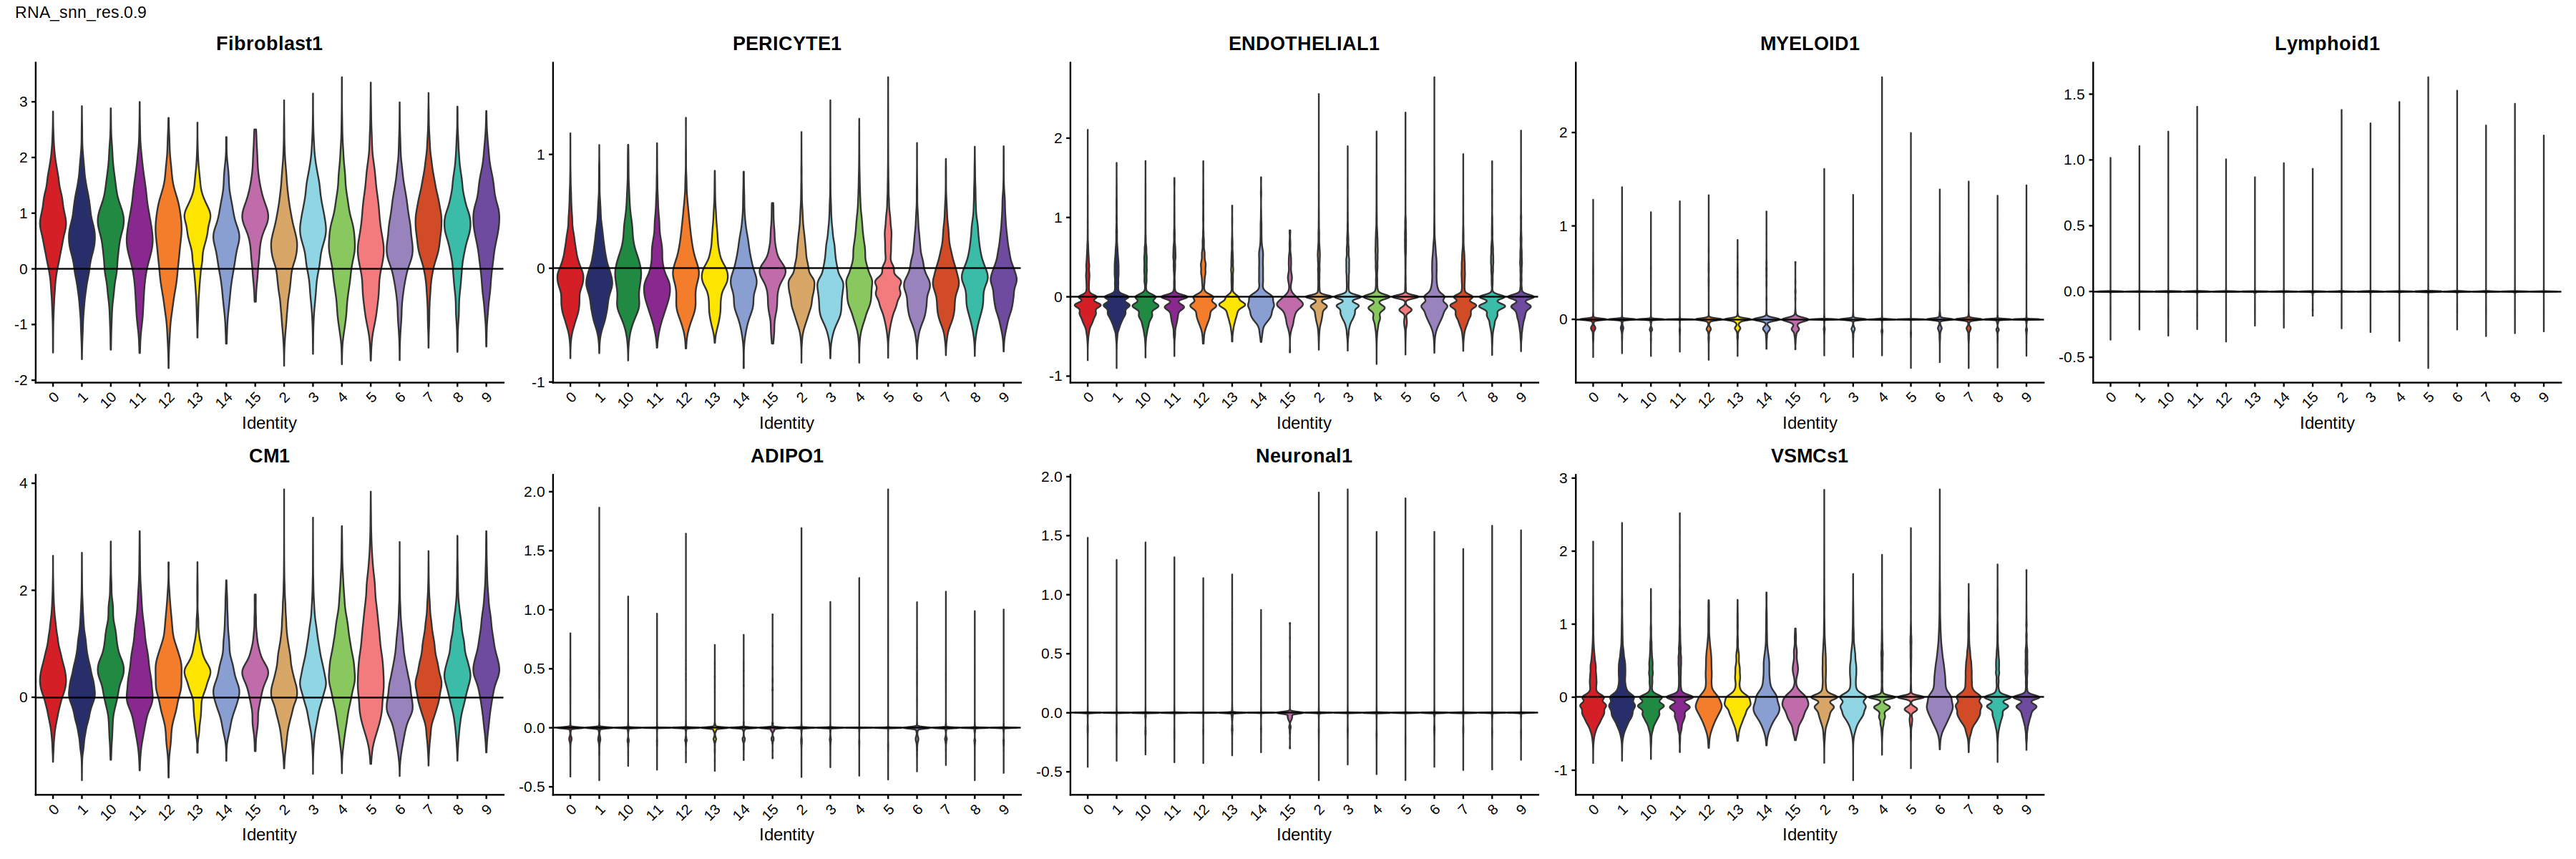

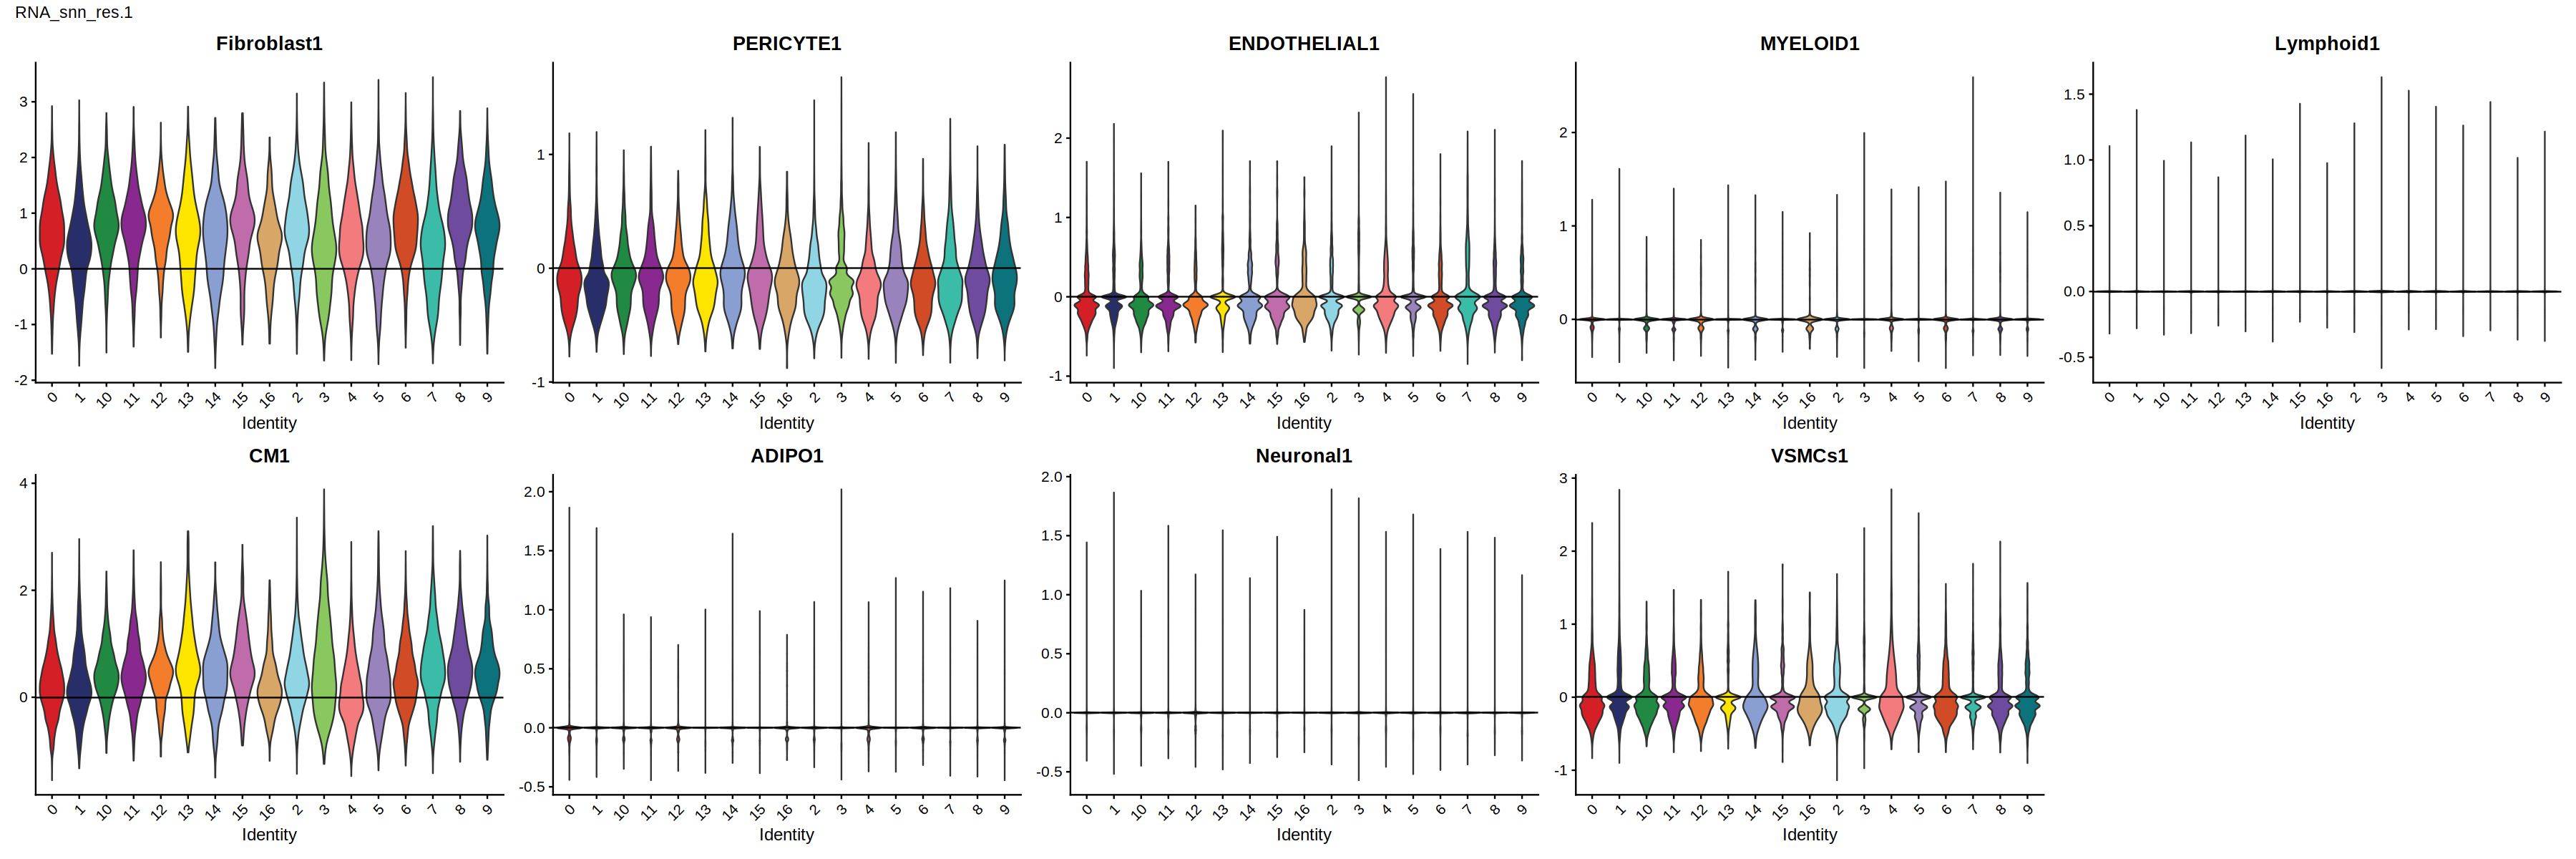

In [67]:
options(repr.plot.height = 10, repr.plot.width = 30)

for(res in resolutions){
    celltypes <- c("Fibroblast", "PERICYTE", "ENDOTHELIAL", "MYELOID", "Lymphoid", "CM", "ADIPO", "Neuronal", "VSMCs")
    
    Idents(coembed) <- glue::glue("RNA_snn_res.{res}")
    cols <- ArchR::paletteDiscrete(coembed@meta.data[, glue::glue("RNA_snn_res.{res}")])
    
    plotlist <- lapply(celltypes, function(x){
        p <- VlnPlot(coembed, features = glue::glue("{x}1"), pt.size = 0, cols = cols) + NoLegend() +
            geom_hline(yintercept = 0) + ggtitle(x)
        
        return(p)
    })
    
    p <- patchwork::wrap_plots(plotlist, nrow = 2) +
    patchwork::plot_annotation(title = glue::glue("RNA_snn_res.{res}"))
    
    print(p)
}

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Cluster'. You can override using the `.groups` argument.



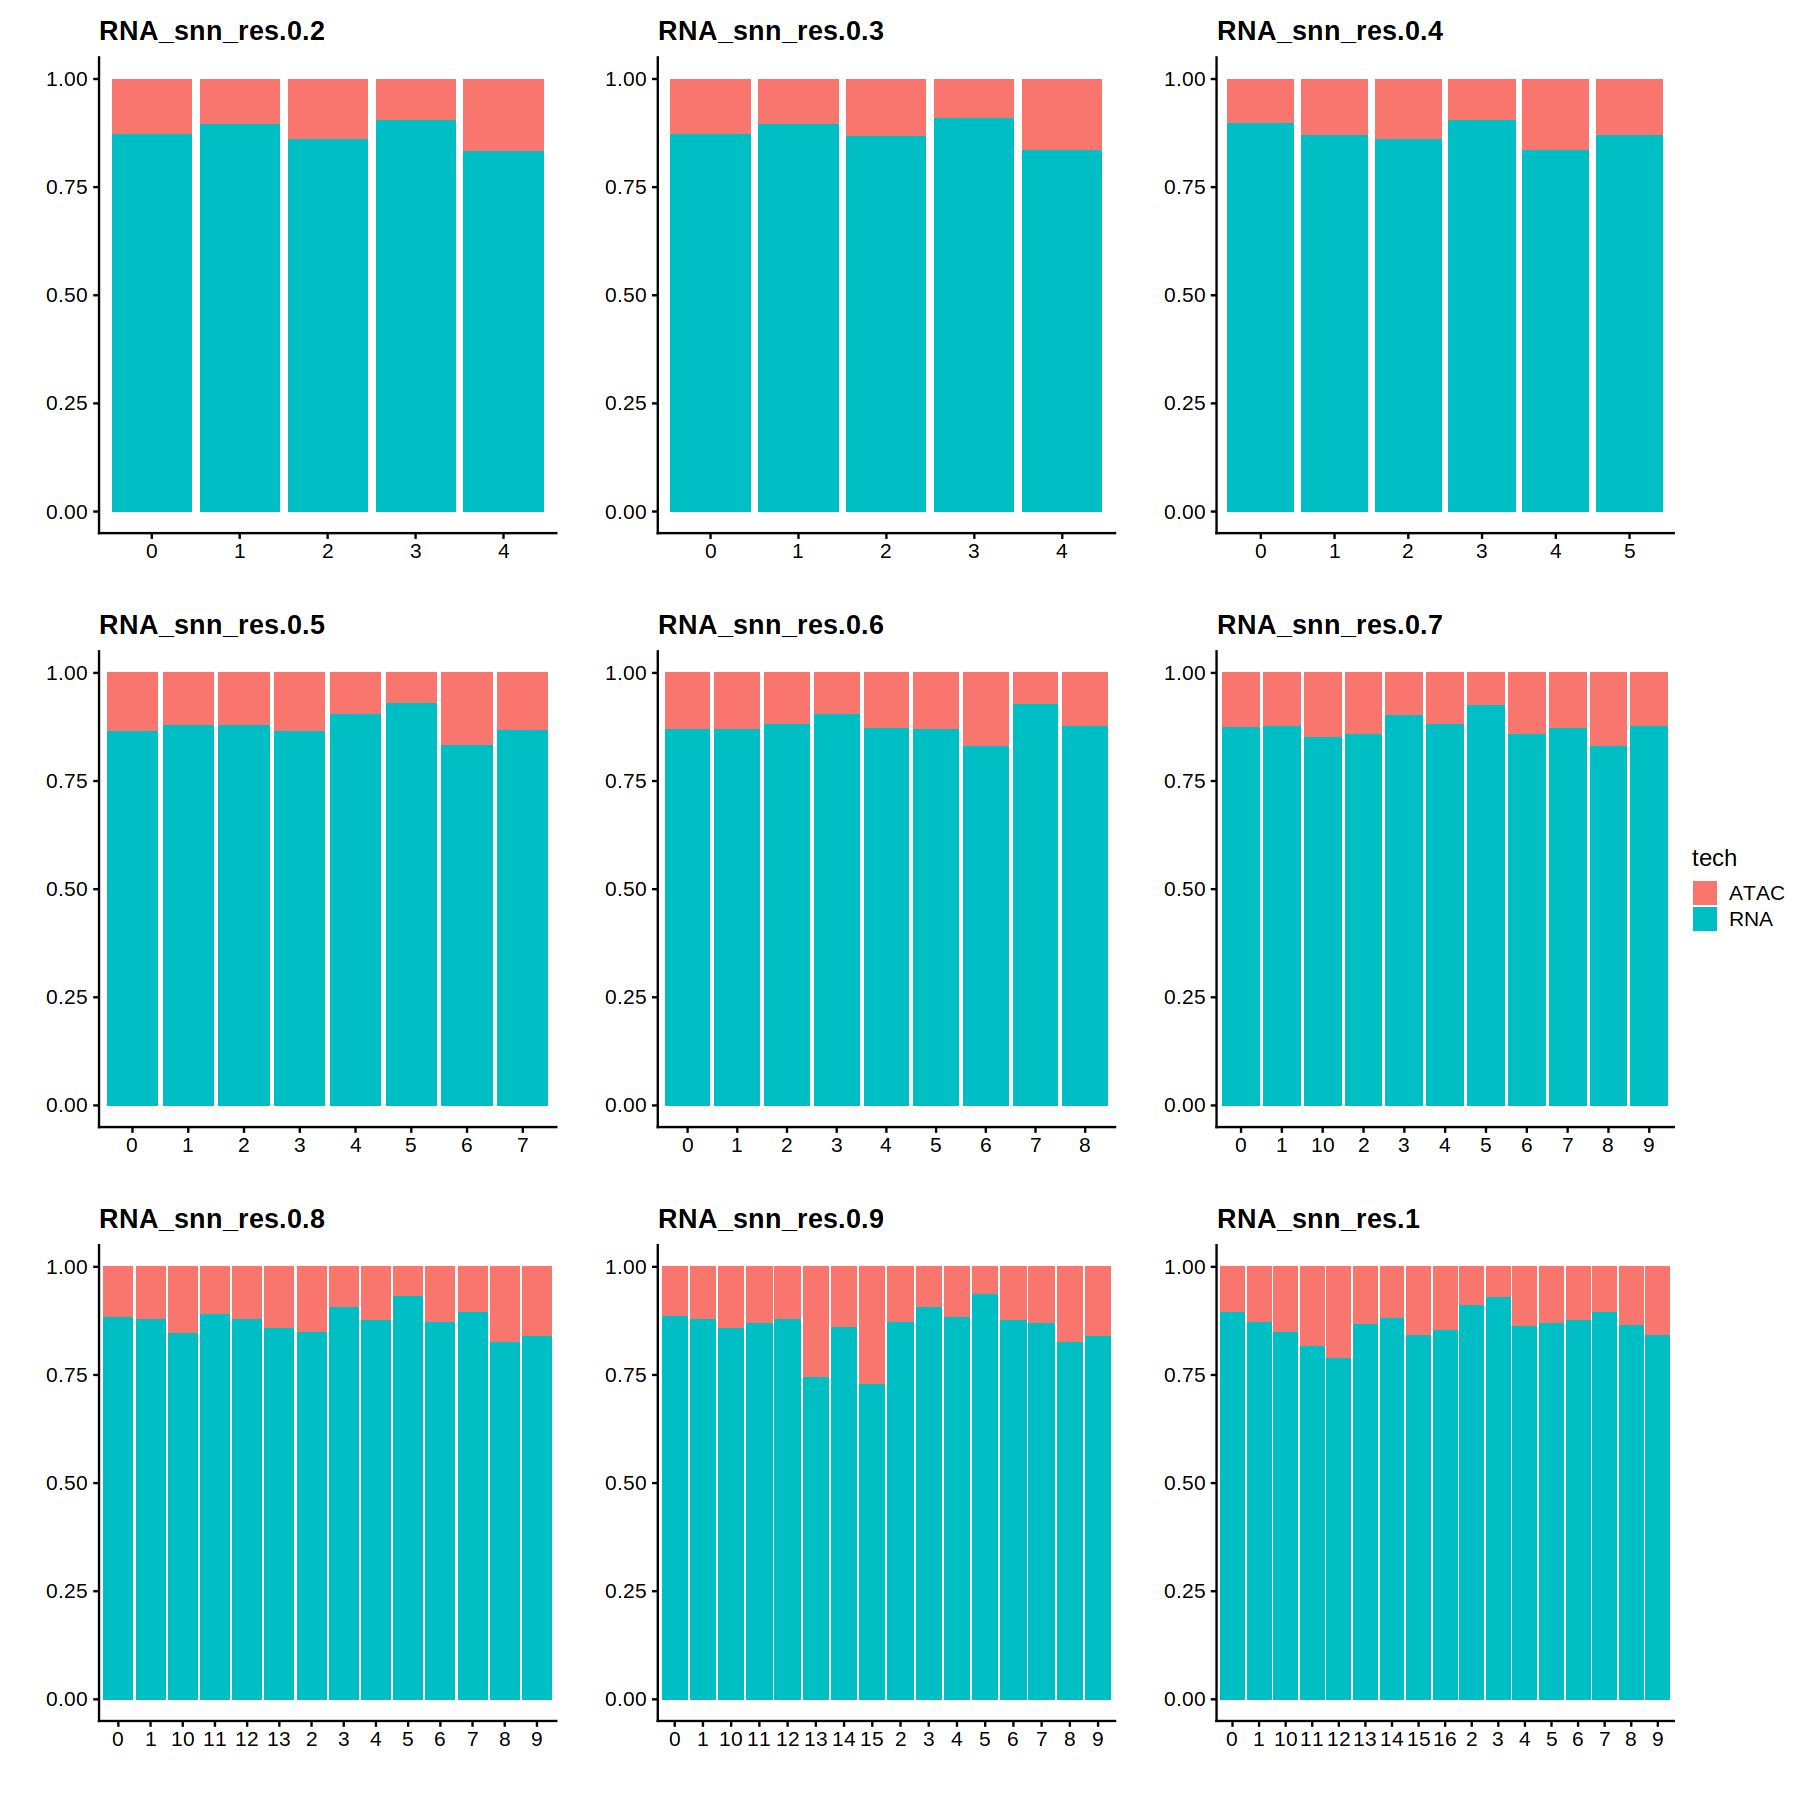

In [53]:
options(repr.plot.height = 20, repr.plot.width = 20)

plotlist <- lapply(resolutions, function(res){
     df_sub <- coembed@meta.data %>%
    as.data.frame() %>%
        subset(., select = c("tech", glue::glue("RNA_snn_res.{res}")))
    
    colnames(df_sub) <- c("tech", "Cluster")
    
    df_plot <- df_sub %>%
        group_by(Cluster, tech) %>%
        summarise(counts = n()) %>%
        mutate(props = counts / sum(counts))
    
    p <- ggplot(data = df_plot, aes(x = Cluster, y = props, fill = tech)) +
        geom_bar(stat = "identity") +
        theme_cowplot() +
        xlab("") + ylab("") +
        ggtitle(glue::glue("RNA_snn_res.{res}"))
    
    return(p)
})

patchwork::wrap_plots(plotlist, guides = "collect", ncol = 3)